In [1]:
# importing all the necessary libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_df = pd.read_csv("_BANKRUPTCY PREDICTION .csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
bank_df.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256970e-04   
1                               0.781506             2.897850e-04   
2                               0.780284             2.361300e-04   
3                               0.781241             1.078890e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

In [5]:
bank_df.shape

(6819, 95)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [7]:
bank_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.5668

In [8]:
bank_df["Bankrupt"].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

sns.countplot(x='Bankrupt',data=bank_df)

In [213]:
# From above we can see that data is highly imbalanced and hence we will do oversampling later to balance the dataset otherwise
# our model will predict well for non-bankrupt data as compared to bankrupt data

In [11]:
print(bank_df.columns)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan �',
       ' Operating Profit Per Share (Yuan �',
       ' Per Share Net profit before tax (Yuan �',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', '

In [12]:
#removing white spaces before the column names 
bank_df.rename(columns=lambda x: x.strip(),inplace=True)

<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

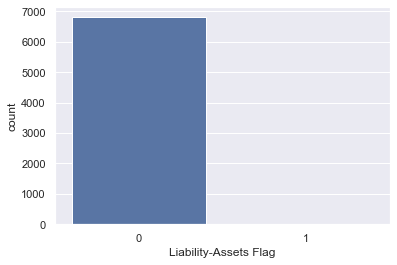

In [13]:
sns.countplot(x="Liability-Assets Flag", data=bank_df)

<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

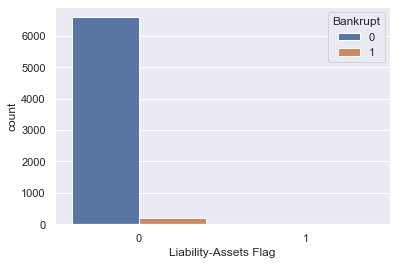

In [14]:
sns.countplot(x ='Liability-Assets Flag', hue = "Bankrupt", data = bank_df)

In [15]:
# As we can see that the Liability-Assets Flag has only one value which is associated for both the output categories hence we can drop it

bank_df = bank_df.drop(["Liability-Assets Flag"], axis = 1)

In [16]:
bank_df.isnull().sum()

ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B)                                    0
Net Value Per Share (A) 

In [17]:
bank_df["Research and development expense rate"].value_counts()

0.000000e+00    1424
4.410000e+08      22
6.450000e+08      21
8.150000e+08      21
3.230000e+08      19
4.580000e+08      19
1.140000e+09      18
9.680000e+08      18
1.410000e+09      17
1.190000e+08      17
1.050000e+09      17
5.260000e+07      17
9.000000e+08      17
5.430000e+08      17
7.470000e+08      16
5.940000e+08      16
1.320000e+09      16
5.090000e+07      16
3.570000e+08      16
7.980000e+07      16
4.240000e+08      16
3.360000e+09      16
2.700000e+09      16
1.490000e+09      15
1.850000e+09      15
1.150000e+08      15
3.740000e+09      15
1.870000e+09      15
1.020000e+09      15
2.260000e+09      15
3.500000e+09      15
1.270000e+09      14
3.120000e+08      14
3.920000e+09      14
3.340000e+09      14
3.400000e+07      14
2.280000e+09      14
1.290000e+09      14
1.360000e+09      14
3.750000e+09      14
1.340000e+09      14
1.120000e+09      14
8.660000e+08      14
4.750000e+08      14
9.510000e+08      13
4.570000e+09      13
3.580000e+09      13
4.860000e+08 

In [18]:
bank_df.isna().sum()

ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B)                                    0
Net Value Per Share (A) 

In [19]:
# Now checking the Duplicated data if any to remove the redundency

bank_df.duplicated().sum()

0

In [20]:
bank_df[bank_df["Current Ratio"]>1]["Bankrupt"].value_counts()

0    1
Name: Bankrupt, dtype: int64

In [21]:
bank_df[bank_df["Operating Expense Rate"]>1]["Bankrupt"].value_counts()

0    2215
1      67
Name: Bankrupt, dtype: int64

In [22]:
bank_df[bank_df["Operating Expense Rate"]<=1]["Bankrupt"].value_counts()

0    4384
1     153
Name: Bankrupt, dtype: int64

In [23]:
print(bank_df[bank_df["Revenue Per Share (Yuan �"]>1]["Bankrupt"].value_counts())

0    5
Name: Bankrupt, dtype: int64


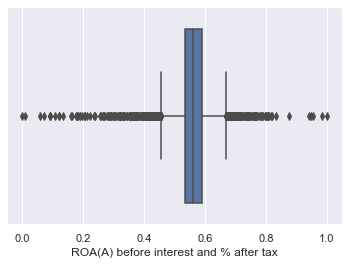

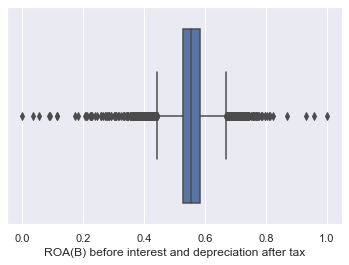

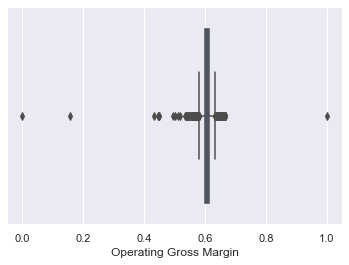

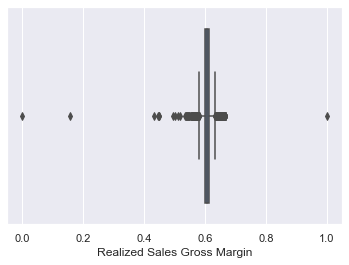

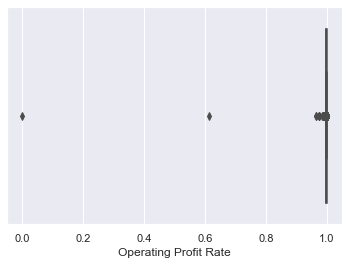

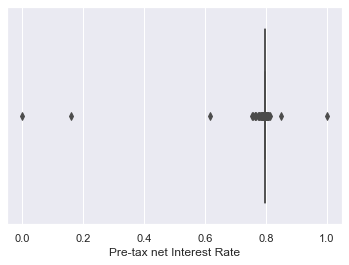

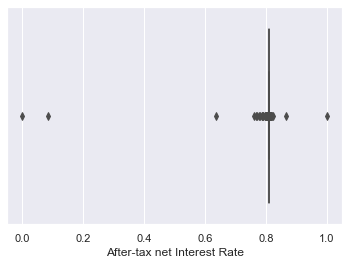

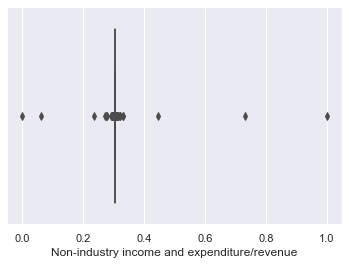

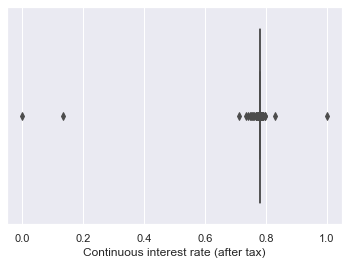

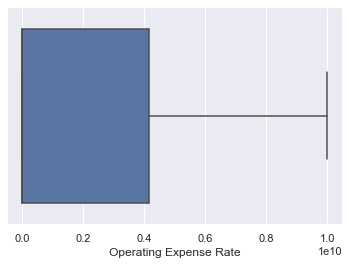

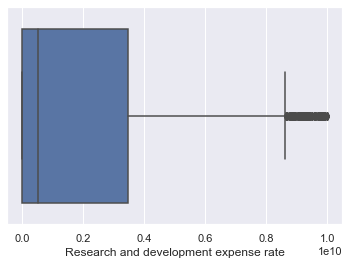

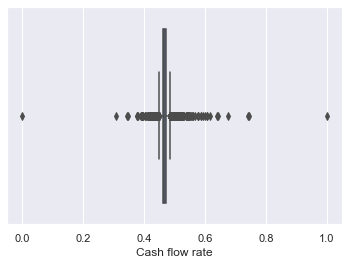

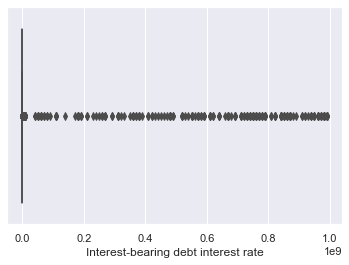

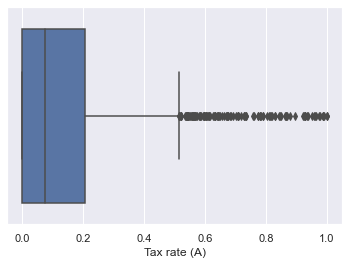

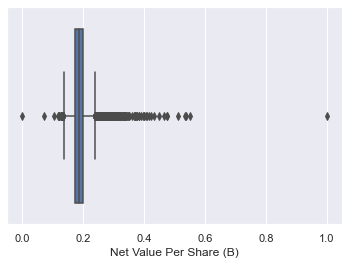

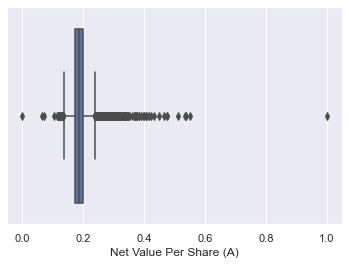

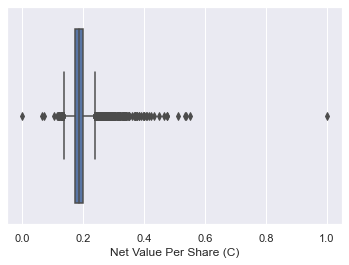

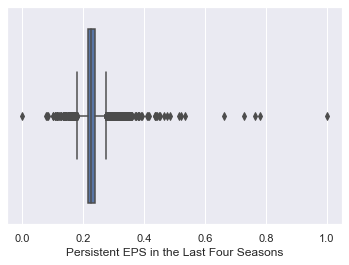

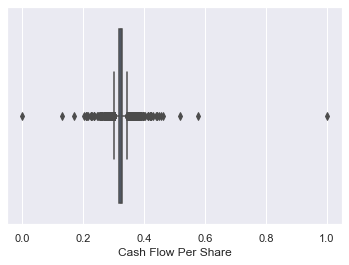

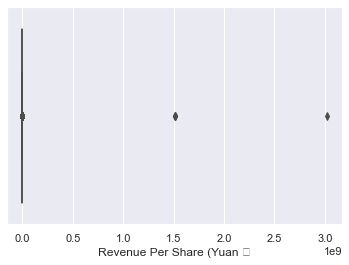

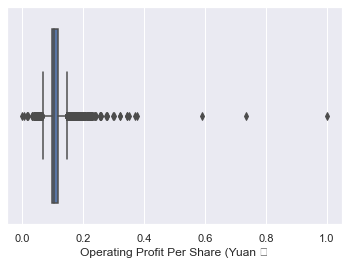

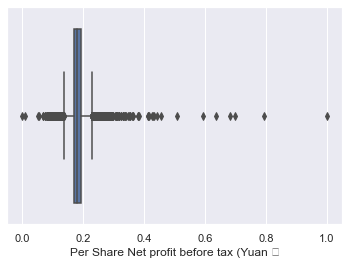

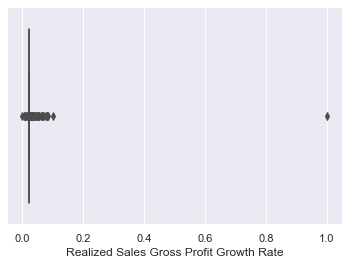

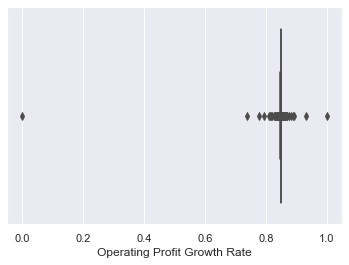

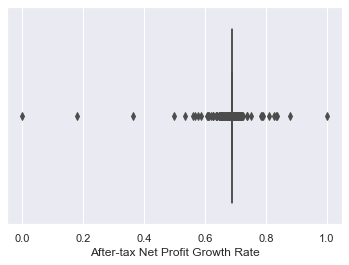

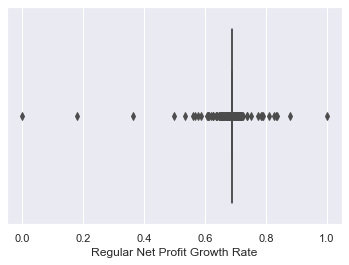

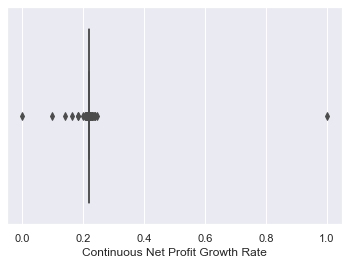

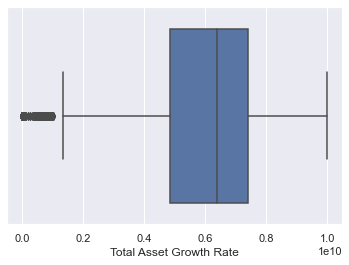

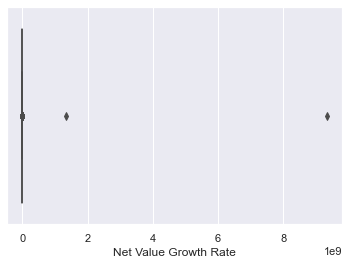

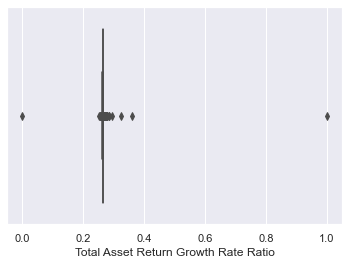

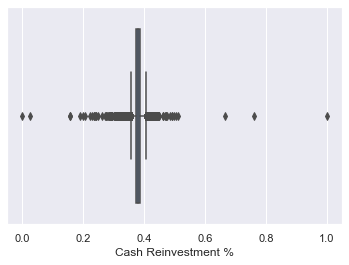

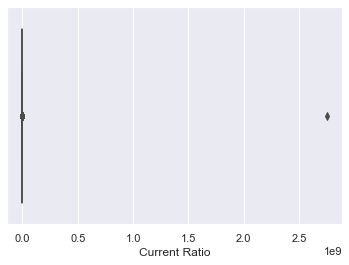

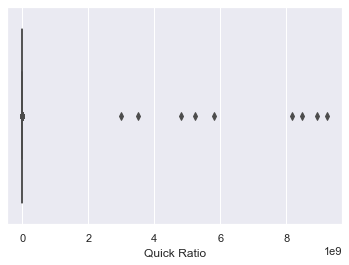

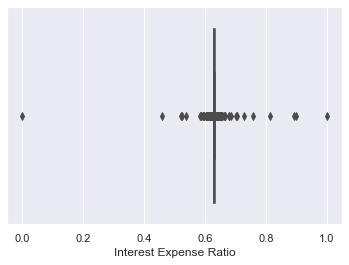

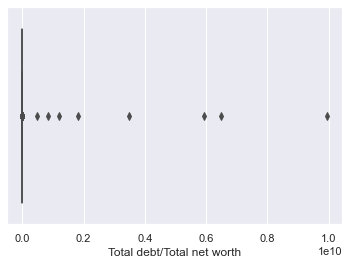

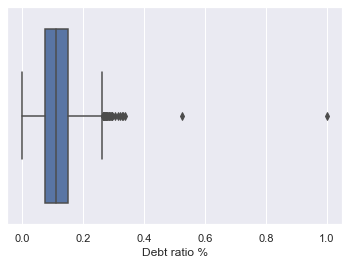

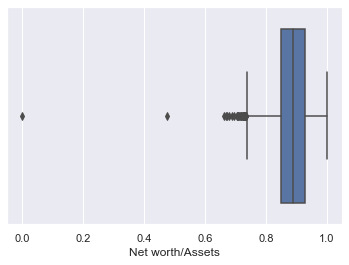

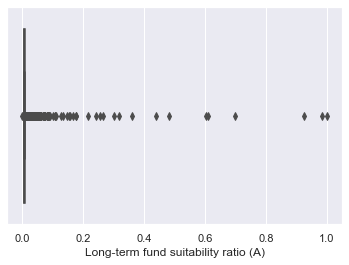

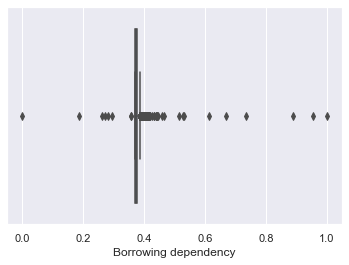

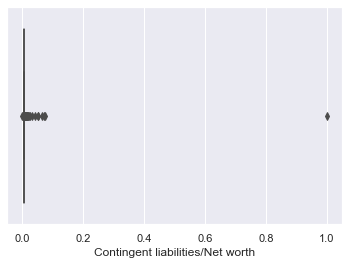

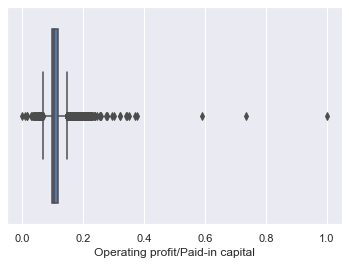

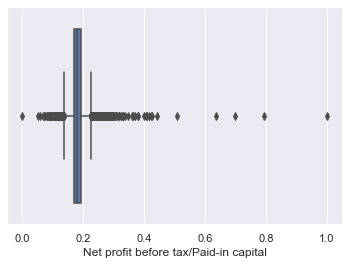

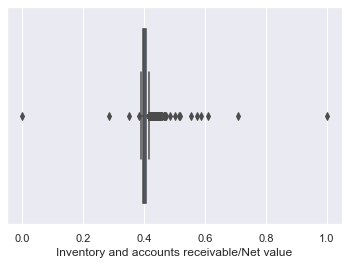

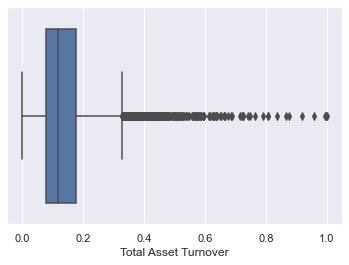

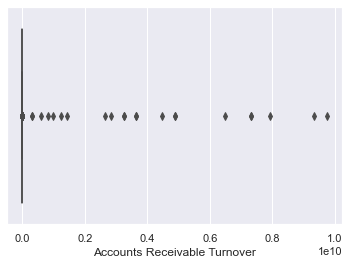

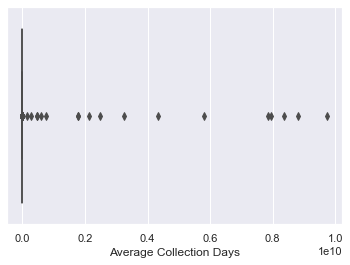

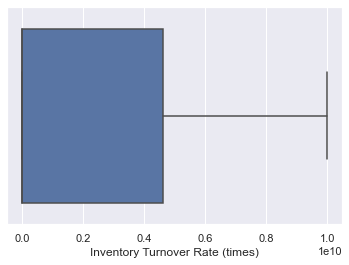

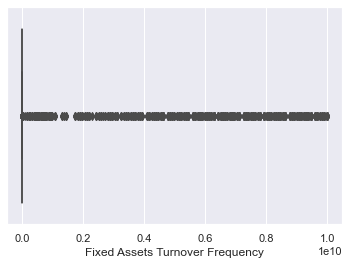

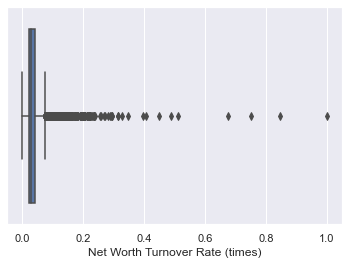

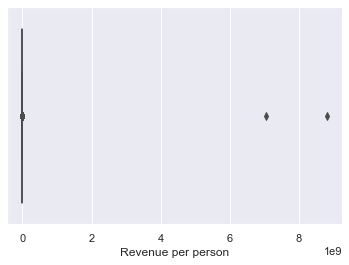

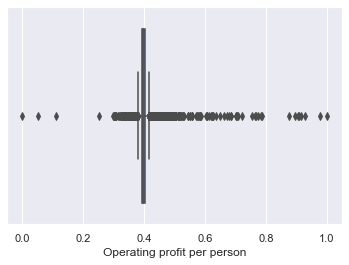

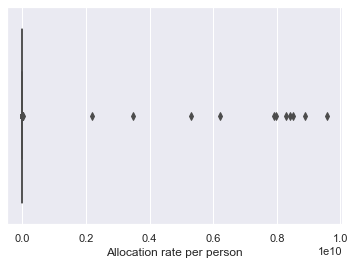

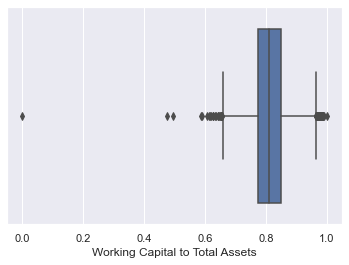

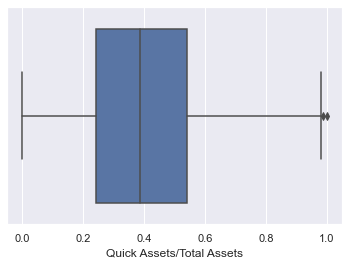

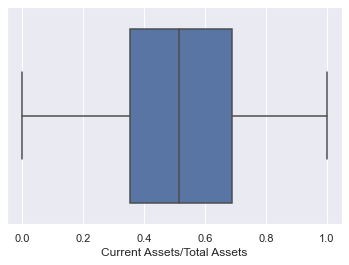

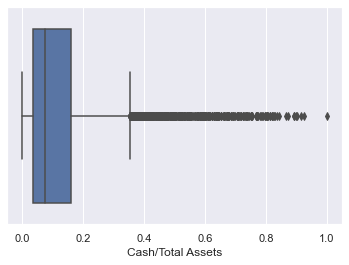

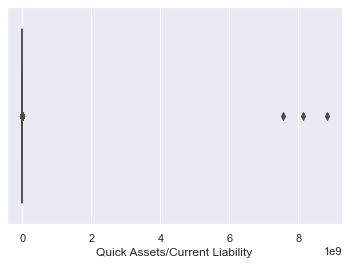

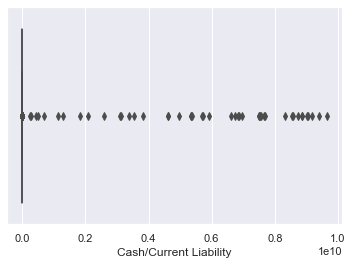

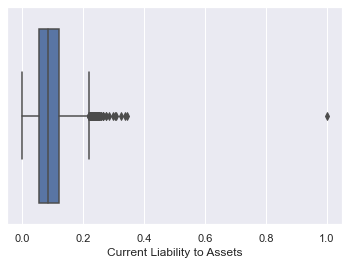

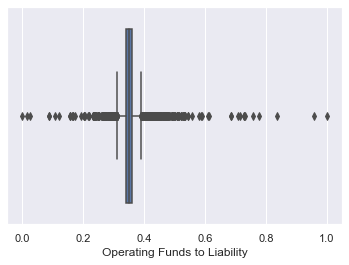

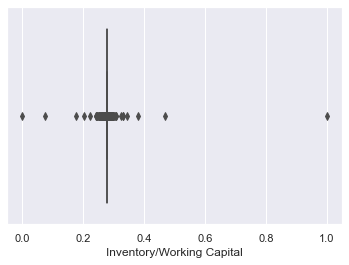

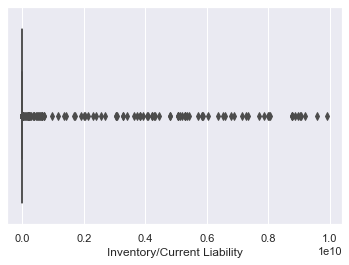

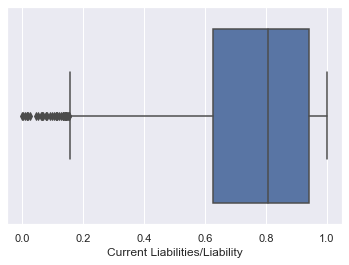

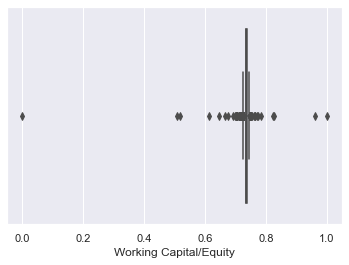

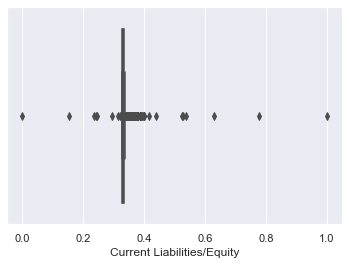

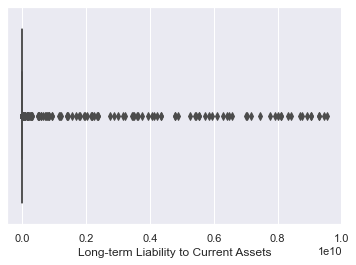

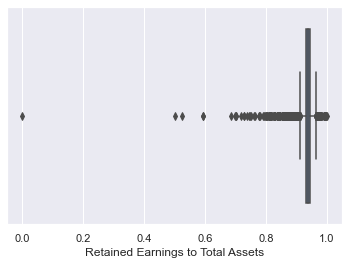

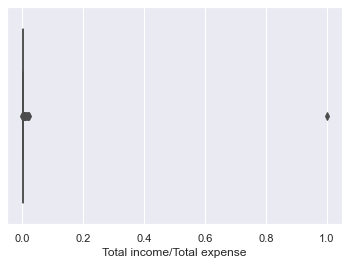

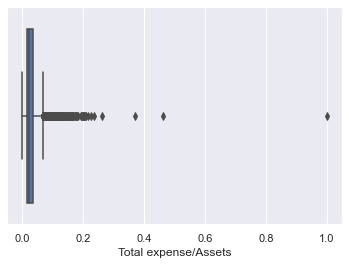

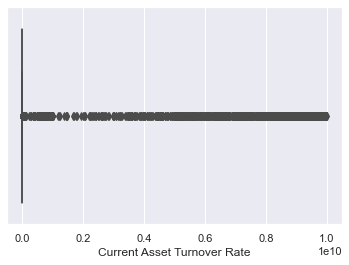

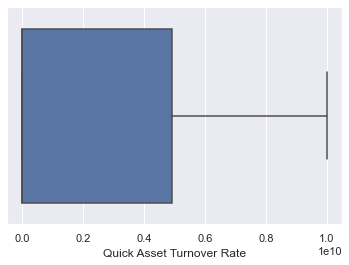

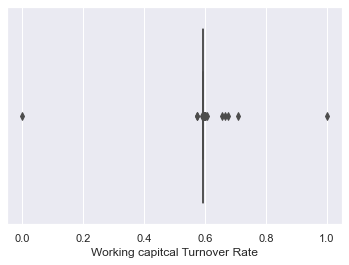

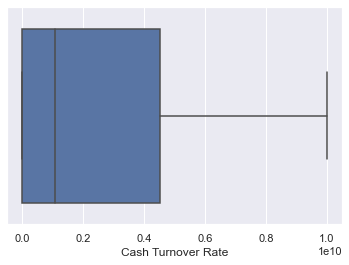

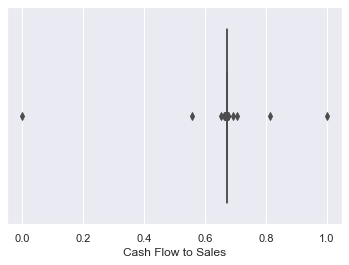

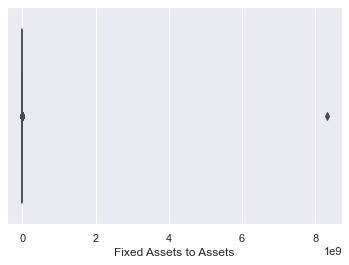

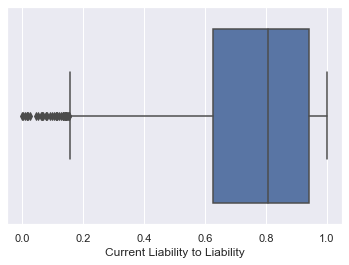

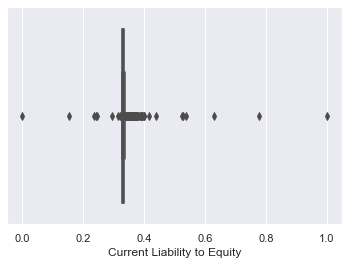

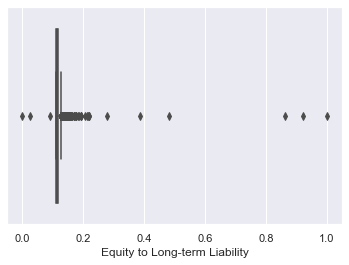

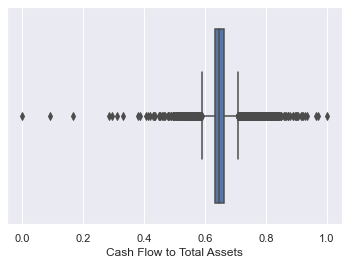

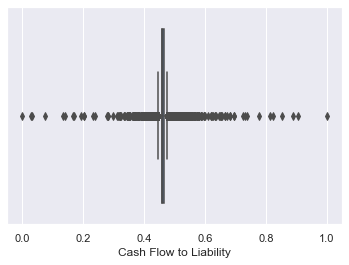

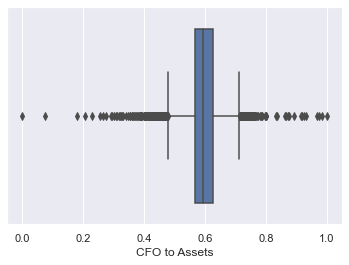

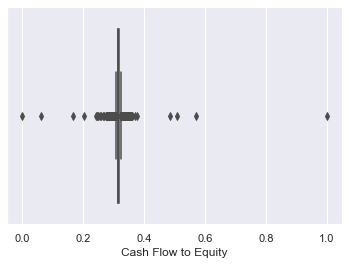

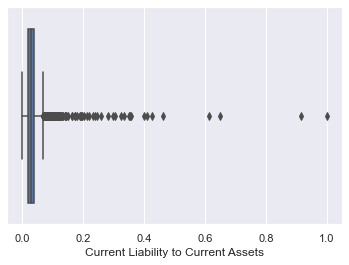

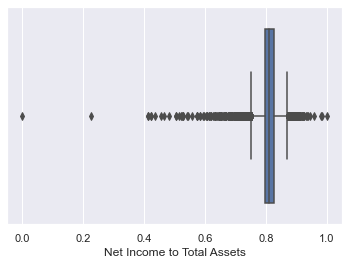

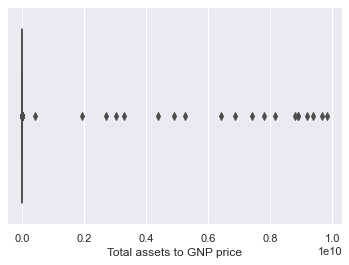

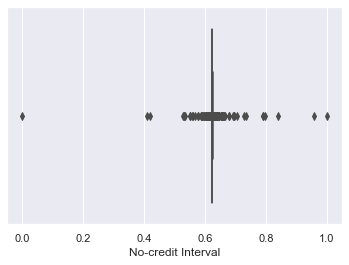

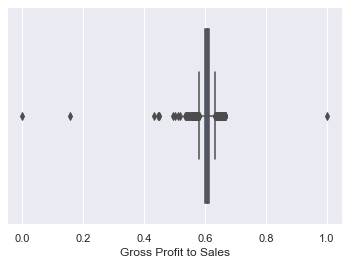

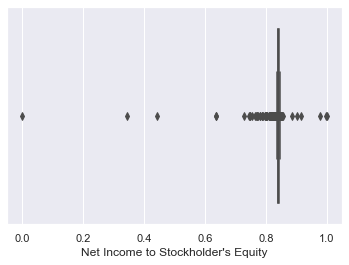

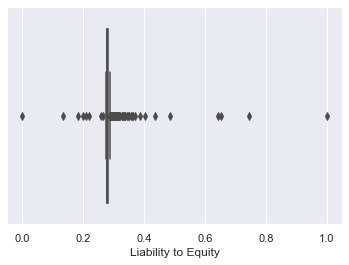

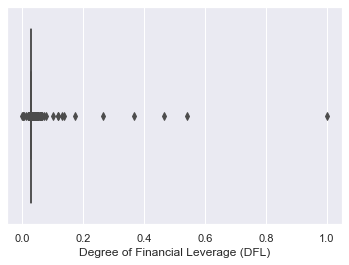

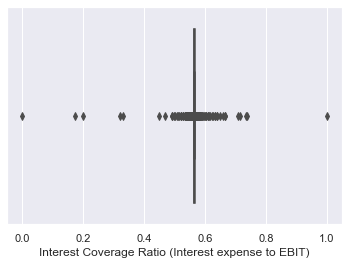

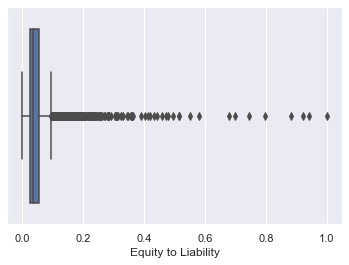

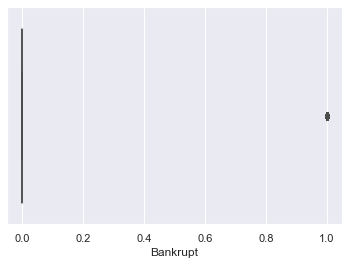

In [24]:
# checking outlier

def boxplots(col):
    sns.boxplot(bank_df[col])
    plt.show()
    
for i in list(bank_df.select_dtypes(exclude=['object']).columns[1:]):
    boxplots(i)

In [25]:
# from the box plot and descriptive analysis of the data we can see that for most of the features data lies within the range of
# 0 to 1 hence outlier treatment is not necessary for those features.

# There are some features for which data range is very high where outlier treatment is necessary.
# We will find such features and do the outlier treatment for those.

In [26]:
def find_outlier_column_names(df):
    columns = df.columns
    l1 = []
    for i in columns:
        if df[i].max() > 1:
            l1.append(i)
    return l1

In [27]:
treat_columns = find_outlier_column_names(bank_df)

In [28]:
len(treat_columns)

24

In [29]:
def find_bankrupcy_value_counts(cols):
    for i in cols:
        IQR = bank_df[i].quantile(0.75) - bank_df[i].quantile(0.25)
        upper_limit = bank_df[i].quantile(0.75) + 1.5 * IQR
        print(f"value count for more than 75 percentile of column {i} is:")
        print(bank_df[bank_df[i] > upper_limit]["Bankrupt"].value_counts())

In [30]:
find_bankrupcy_value_counts(treat_columns)

value count for more than 75 percentile of column Operating Expense Rate is:
Series([], Name: Bankrupt, dtype: int64)
value count for more than 75 percentile of column Research and development expense rate is:
0    177
1      5
Name: Bankrupt, dtype: int64
value count for more than 75 percentile of column Interest-bearing debt interest rate is:
0    393
1      3
Name: Bankrupt, dtype: int64
value count for more than 75 percentile of column Revenue Per Share (Yuan � is:
0    472
1      6
Name: Bankrupt, dtype: int64
value count for more than 75 percentile of column Total Asset Growth Rate is:
Series([], Name: Bankrupt, dtype: int64)
value count for more than 75 percentile of column Net Value Growth Rate is:
0    650
1      6
Name: Bankrupt, dtype: int64
value count for more than 75 percentile of column Current Ratio is:
0    587
1      2
Name: Bankrupt, dtype: int64
value count for more than 75 percentile of column Quick Ratio is:
0    588
1      3
Name: Bankrupt, dtype: int64
value cou

In [31]:
# From the above result we can say that there is significant amount of data present for both bankrupt and non-bankrupt class
# in the outliers, hence dropping those data is not a good choice and hence we will perform imputing of those outliers using IQR
# method

In [32]:
# Performing outlier treatment
def remove_outliers(columns):
    for i in columns:
        Q1 = bank_df[i].quantile(0.25)
        Q3 = bank_df[i].quantile(0.75)
        IQR = Q3 - Q1
        pos_outlier = Q3 + 1.5*IQR
        neg_outlier = Q1 - 1.5*IQR
        bank_df[i] = np.where(bank_df[i] < (Q1 - 1.5*IQR), neg_outlier, bank_df[i])
        bank_df[i] = np.where(bank_df[i] > (Q3 + 1.5*IQR), pos_outlier, bank_df[i])
    return print("Outlier treatment is done for given columns")
    

In [33]:
remove_outliers(treat_columns)

Outlier treatment is done for given columns


In [34]:
bank_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000         
mean                                            0.505180         
std                                             0.060686         
min                                             0.000000         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.781567            1.566870e-04   
50%                                0.781635            2.777590e-04   
75%        

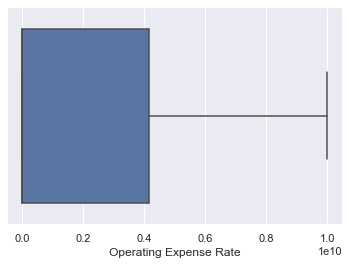

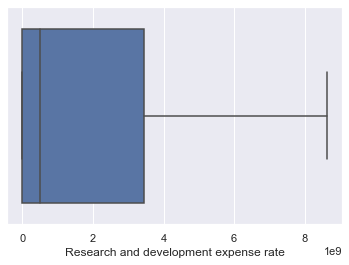

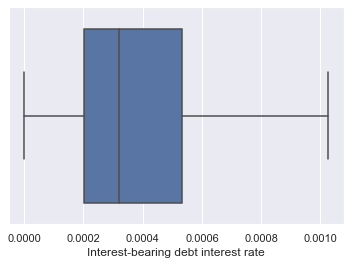

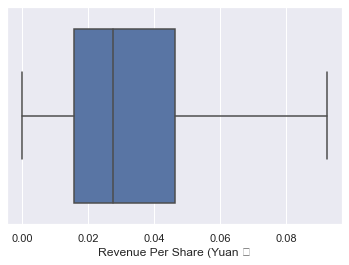

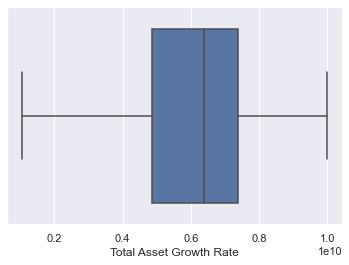

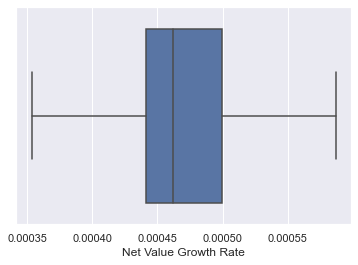

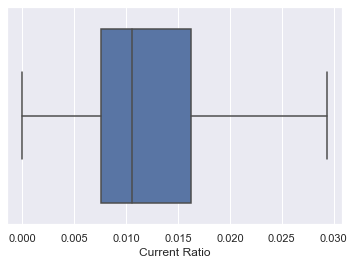

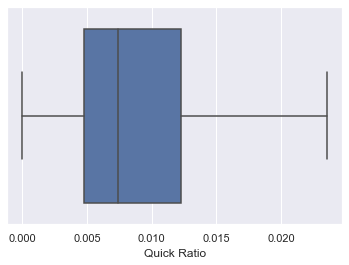

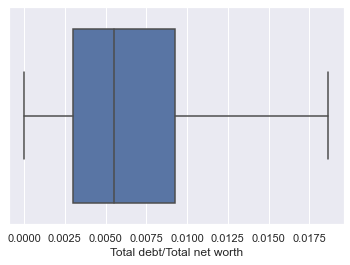

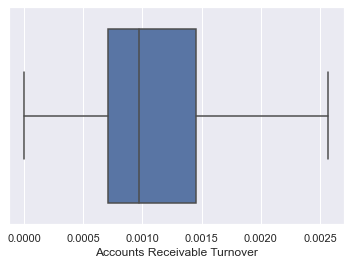

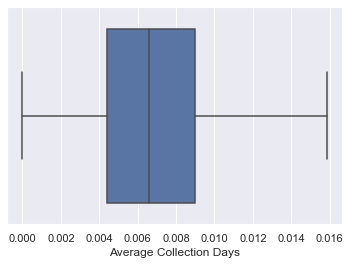

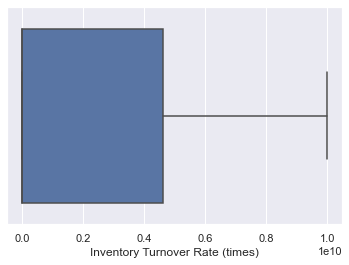

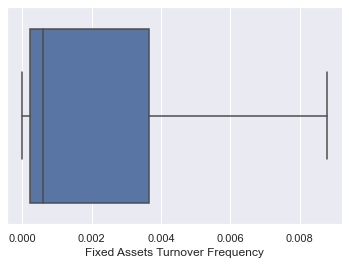

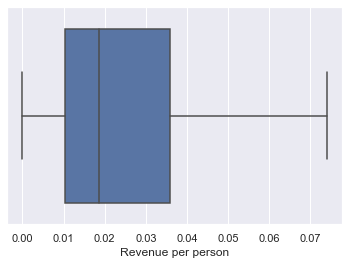

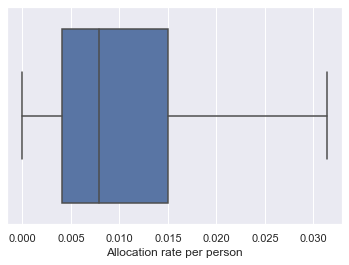

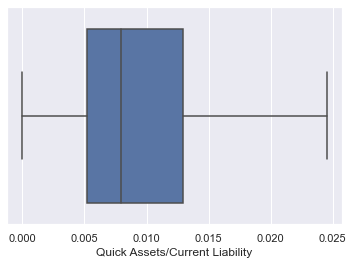

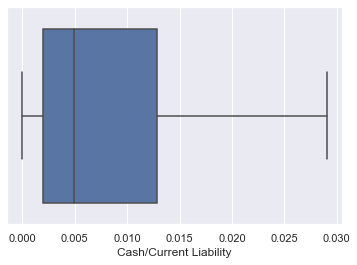

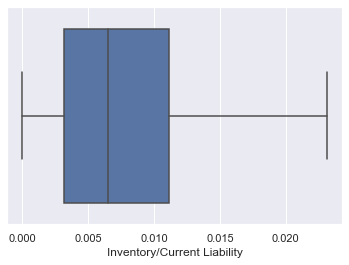

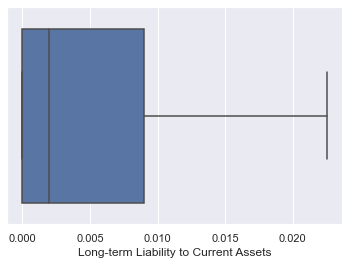

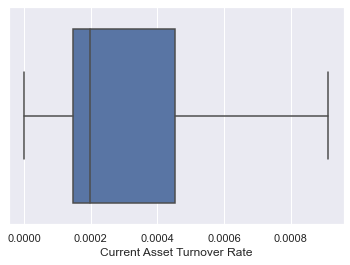

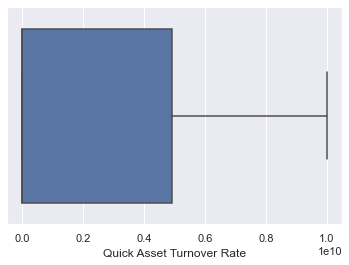

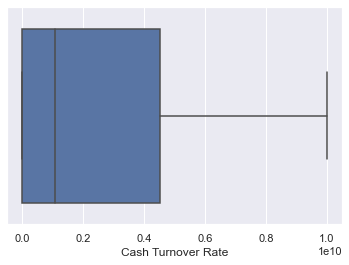

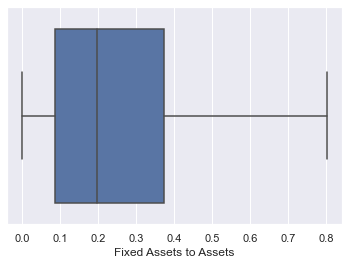

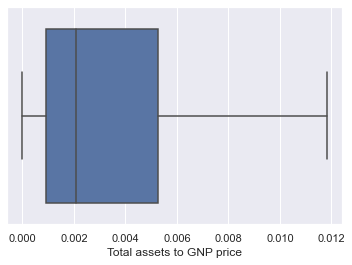

In [35]:
# checking outlier again for specified columns
    
for i in treat_columns:
    boxplots(i)

In [36]:
# Now all the outliers has been treated for specified columns.

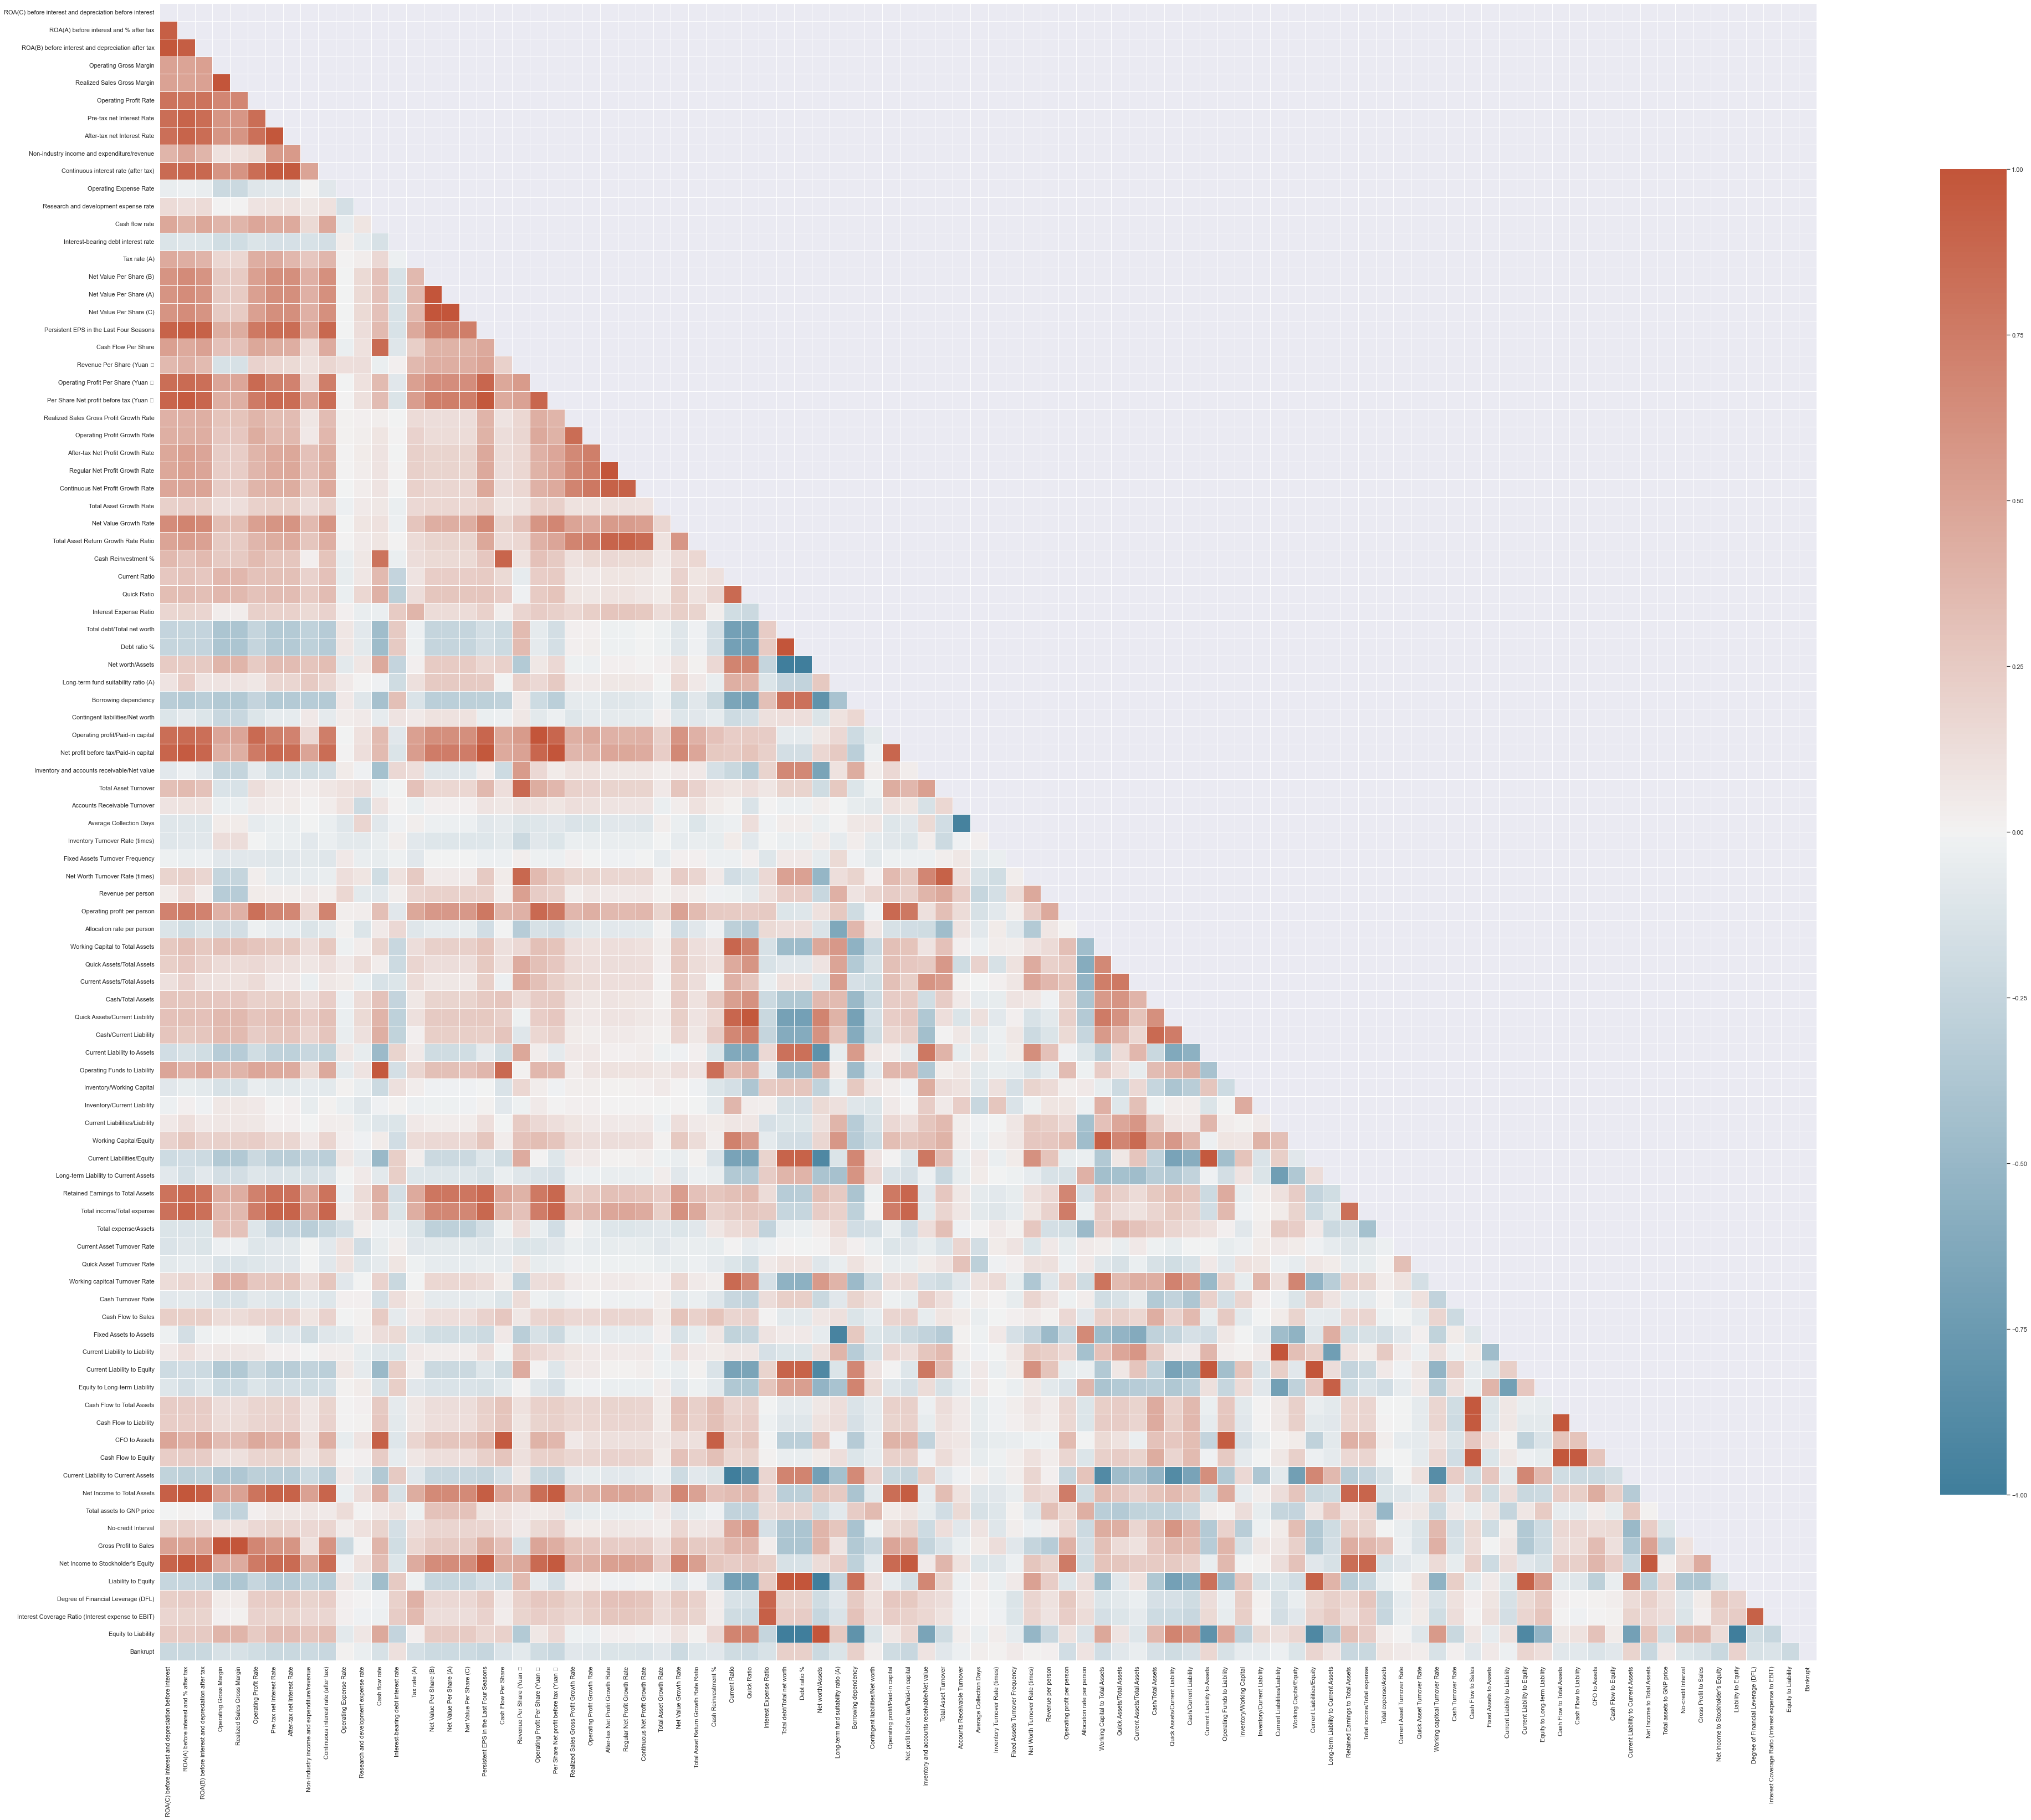

In [37]:
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(80, 55))
mat = bank_df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.8, cbar_kws={"shrink": .8})
plt.show()

In [39]:
def find_correlated_columns(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = find_correlated_columns(bank_df, 0.9)
len(corr_features)

22

In [41]:
print(corr_features)

{'ROA(A) before interest and % after tax', 'Operating profit/Paid-in capital', 'Net Value Per Share (A)', 'Per Share Net profit before tax (Yuan �', 'Regular Net Profit Growth Rate', 'Net Income to Total Assets', 'Quick Ratio', 'Cash Flow to Sales', 'Net worth/Assets', 'Debt ratio %', 'Quick Assets/Current Liability', 'Realized Sales Gross Margin', 'Liability to Equity', 'Current Liability to Liability', 'Pre-tax net Interest Rate', 'Net Value Per Share (C)', 'Continuous interest rate (after tax)', 'Gross Profit to Sales', 'Current Liability to Equity', 'Net profit before tax/Paid-in capital', 'After-tax net Interest Rate', 'ROA(B) before interest and depreciation after tax'}


In [42]:
new_bank_df = bank_df.drop(corr_features, axis=1)

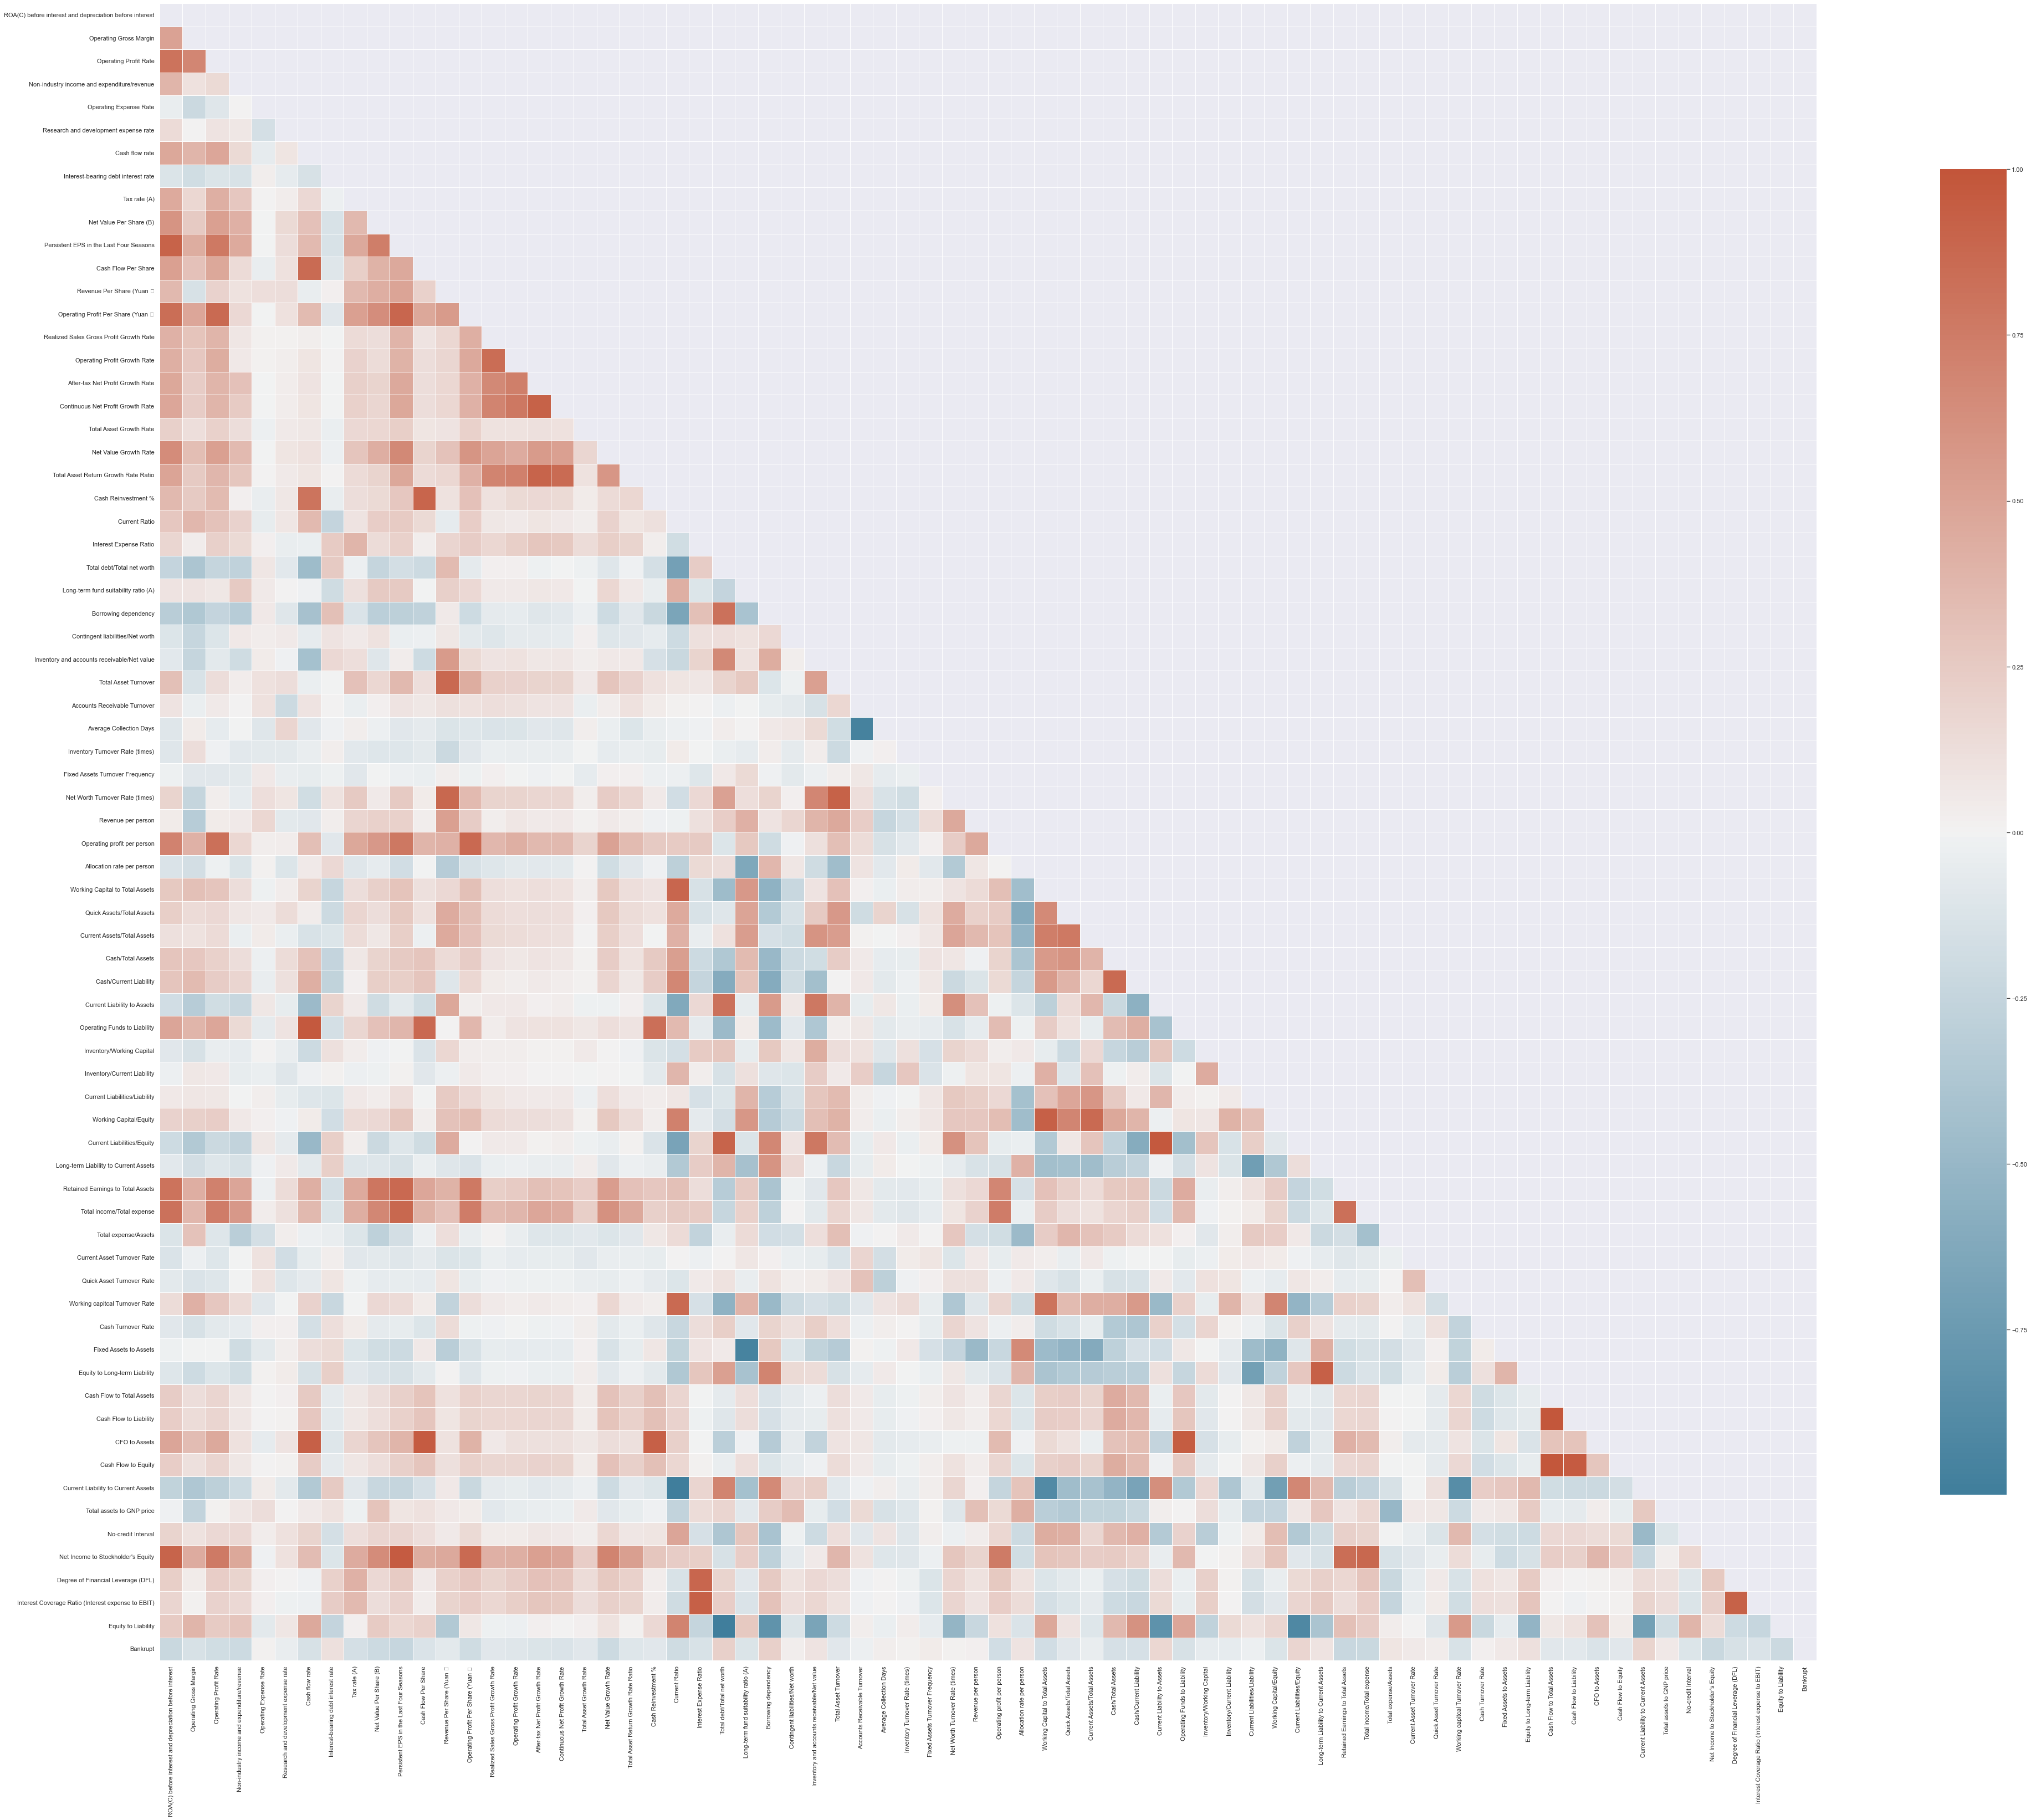

In [43]:
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(80, 55))
mat = new_bank_df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.8, cbar_kws={"shrink": .8})
plt.show()

In [44]:
corr_features_2 = find_correlated_columns(new_bank_df, 0.90)
len(corr_features_2)

0

In [45]:
mat = new_bank_df.corr('spearman')
mat

ROA(C) before interest and depreciation before interest  \
ROA(C) before interest and depreciation before ...                                           1.000000         
Operating Gross Margin                                                                       0.506232         
Operating Profit Rate                                                                        0.806463         
Non-industry income and expenditure/revenue                                                  0.386448         
Operating Expense Rate                                                                      -0.041300         
Research and development expense rate                                                        0.147789         
Cash flow rate                                                                               0.473233         
Interest-bearing debt interest rate                                                         -0.118374         
Tax rate (A)                                                                                 0.458064         
Net Value Per Share (B)                                                                      0.595933         
Persistent EPS in the Last Four Seasons                                                      0.907933         
Cash Flow Per Share                                                                          0.520784         
Revenue Per Share (Yuan �                                                                    0.363299         
Operating Profit Per Share (Yuan �                                                           0.837577         
Realized Sales Gross Profit Growth Rate                                                      0.411926         
Operating Profit Growth Rate                                                                 0.425922         
After-tax Net Profit Growth Rate                                                             0.471091         
Continuous Net Profit Growth Rate                                                            0.478016         
Total Asset Growth Rate                                                                      0.218395         
Net Value Growth Rate                                                                        0.648011         
Total Asset Return Growth Rate Ratio                                                         0.498022         
Cash Reinvestment %                                                                          0.363169         
Current Ratio                                                                                0.268535         
Interest Expense Ratio                                                                       0.174551         
Total debt/Total net worth                                                                  -0.251580         
Long-term fund suitability ratio (A)                                                         0.091547         
Borrowing dependency                                                                        -0.314196         
Contingent liabilities/Net worth                                                            -0.112523         
Inventory and accounts receivable/Net value                                                 -0.084846         
Total Asset Turnover                                                                         0.314388         
Accounts Receivable Turnover                                                                 0.088655         
Average Collection Days                                                                     -0.095252         
Inventory Turnover Rate (times)                                                             -0.100245         
Fixed Assets Turnover Frequency                                                             -0.022322         
Net Worth Turnover Rate (times)                                                              0.187960         
Revenue per person                                      

In [46]:
# As by using correletion matrix we have removed highly correlated features to avoid the curse of dimensionality
# Now we can proceed forward with the Feature Scaling

In [47]:
new_bank_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000         
mean                                            0.505180         
std                                             0.060686         
min                                             0.000000         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             1.000000         

       Operating Gross Margin  Operating Profit Rate  \
count             6819.000000            6819.000000   
mean                 0.607948               0.998755   
std                  0.016934               0.013010   
min                  0.000000               0.000000   
25%                  0.600445               0.998969   
50%                  0.605997               0.999022   
75%                  0.613914               0.999095   
max                  1.000000               1.000000   

       Non-industry income and expenditure/revenue  Operating Expense Rate  \
count                                  6819.000000            6.819000e+03   
mean                                      0.303623            1.995347e+09   
std                                       0.011163            3.237684e+09   
min                                       0.000000            0.000000e+00   
25%                                       0.303466            1.566870e-04   
50%                                       0.303525            2.777590e-04   
75%                                       0.303585            4.145000e+09   
max                                       1.000000            9.990000e+09   

       Research and development expense rate  Cash flow rate  \
count                           6.819000e+03     6819.000000   
mean                            1.932209e+09        0.467431   
std                             2.547733e+09        0.017036   
min                             0.000000e+00        0.000000   
25%                             1.281880e-04        0.461558   
50%                             5.090000e+08        0.465080   
75%                             3.450000e+09        0.471004   
max                             8.625000e+09        1.000000   

       Interest-bearing debt interest rate  Tax rate (A)  \
count                          6819.000000   6819.000000   
mean                              0.000379      0.115001   
std                               0.000274      0.138667   
min                               0.000000      0.000000   
25%                               0.000203      0.000000   
50%                               0.000321      0.073489   
75%                               0.000533      0.205841   
max                               0.001027      1.000000   

       Net Value Per Share (B)  Persistent EPS in the Last Four Seasons  \
count              6819.000000                              6819.000000   
mean                  0.190661                                 0.228813   
std                   0.033390                                 0.033263   
min                   0.000000                                 0.000000   
25%                   0.173613                                 0.214711   
50%                   0.184400                                 0.224544   
75%                   0.199570                                 0.238820   
max                   1.000000                                 1.000000   

       Cash Flow Per Share  Revenue Per Share (Yuan �  \
count          6819.000000                6819.000000   
mean              0.323482                   0.034366   
std               0.017611                   0.024867   
min               0.000000                   0.000000   
25%               0.317748                   0.015631   
50%               0.322487                   0.027376   
75%        

In [48]:
X_train = new_bank_df.drop(["Bankrupt"], axis= 1)
y_train = new_bank_df["Bankrupt"]

In [49]:
# handling imbalanced dataset
import imblearn

In [50]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [51]:
y_train_over.value_counts()

1    6599
0    6599
Name: Bankrupt, dtype: int64

In [191]:
y_train_over_temp = pd.DataFrame(y_train_over, columns=["Bankrupt"])

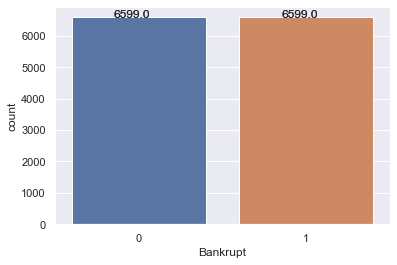

In [192]:
sns.countplot(x='Bankrupt',data=y_train_over_temp)
ax = sns.countplot(x="Bankrupt", data=y_train_over_temp)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [52]:
large_range_columns = x_train_over[["Operating Expense Rate", "Research and development expense rate", "Total Asset Growth Rate", "Inventory Turnover Rate (times)", "Quick Asset Turnover Rate", "Cash Turnover Rate"]]

In [53]:
x_train_over.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   Operating Gross Margin  Operating Profit Rate  \
0                0.601457               0.998969   
1                0.610235               0.998946   
2                0.601450               0.998857   
3                0.583541               0.998700   
4                0.598783               0.998973   

   Non-industry income and expenditure/revenue  Operating Expense Rate  \
0                                     0.302646            1.256970e-04   
1                                     0.303556            2.897850e-04   
2                                     0.302035            2.361300e-04   
3                                     0.303350            1.078890e-04   
4                                     0.303475            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                                 0.193722             0.321674   
4                                 0.212537             0.319162   

   Revenue Per Share (Yuan �  Operating Profit Per Share (Yuan �  \
0                   0.017560                            0.095921   
1                   0.021144                            0.093722   
2                   0.005944                            0.092338   
3                   0.014368                            0.077762   
4                   0.029690                            0.096898   

   Realized Sales Gross Profit Growth Rate  Operating Profit Growth Rate  \
0                                 0.022102                      0.848195   
1                                 0.022080                      0.848088   
2                                 0.022760                      0.848094   
3                                 0.022046                      0.848005   
4                                 0.022096                      0.848258   

   After-tax Net Profit Growth Rate  Continuous Net Profit Growth Rate  \
0                          0.688979                           0.217535   
1                          0.689693                           0.217620   
2                          0.689463                           0.217601   
3                          0.689110                           0.217568   
4                          0.689697                           0.217626   

   Total Asset Growth Rate  Net Value Growth Rate  \
0             4.980000e+09               0.000353   
1             6.110000e+09               0.000443   
2             7.280000e+09               0.000396   
3             4.880000e+09               0.000382   
4             5.510000e+09               0.00

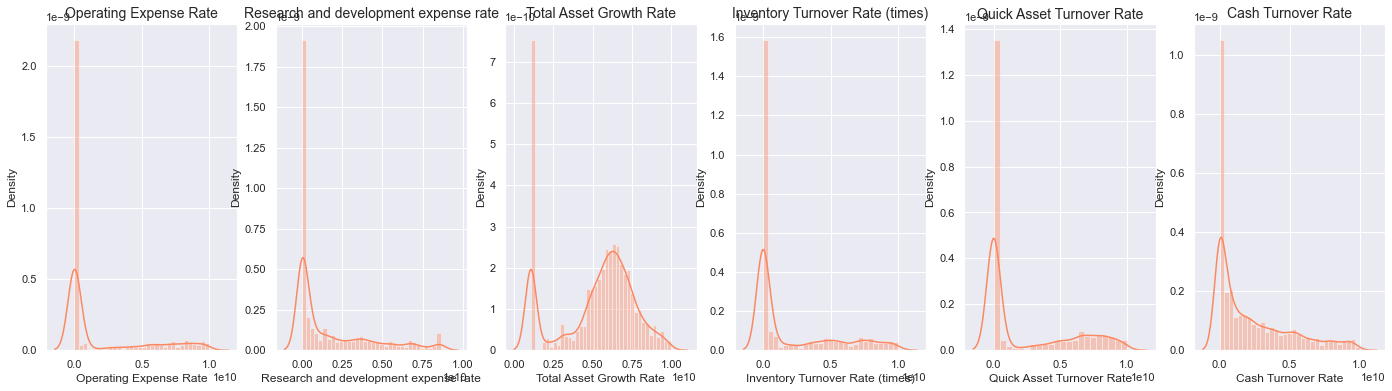

In [54]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(24, 6))

sns.distplot(x_train_over["Operating Expense Rate"], ax=ax1, color='#FB8861')
ax1.set_title('Operating Expense Rate', fontsize=14)

sns.distplot(x_train_over["Research and development expense rate"], ax=ax2, color='#FB8861')
ax2.set_title('Research and development expense rate', fontsize=14)

sns.distplot(x_train_over["Total Asset Growth Rate"], ax=ax3, color='#FB8861')
ax3.set_title('Total Asset Growth Rate', fontsize=14)

sns.distplot(x_train_over["Inventory Turnover Rate (times)"], ax=ax4, color='#FB8861')
ax4.set_title('Inventory Turnover Rate (times)', fontsize=14)

sns.distplot(x_train_over["Quick Asset Turnover Rate"], ax=ax5, color='#FB8861')
ax5.set_title('Quick Asset Turnover Rate', fontsize=14)

sns.distplot(x_train_over["Cash Turnover Rate"], ax=ax6, color='#FB8861')
ax6.set_title('Cash Turnover Rate', fontsize=14)

plt.show()

In [55]:
# As we can see from the above dist plot that for the specified features data is not well distributed 
# Hence we will use Min Max Scaler to scale these columns

# feature scaling
from sklearn.preprocessing import MinMaxScaler
new_scaler = MinMaxScaler()
scaled_columns = new_scaler.fit_transform(large_range_columns)

In [56]:
scaled_columns = pd.DataFrame(scaled_columns, columns=large_range_columns.columns)

In [57]:
scaled_columns.describe()

Operating Expense Rate  Research and development expense rate  \
count            1.319800e+04                           13198.000000   
mean             1.942387e-01                               0.202223   
std              3.246941e-01                               0.285034   
min              0.000000e+00                               0.000000   
25%              1.581171e-14                               0.000000   
50%              2.963834e-14                               0.037449   
75%              3.763764e-01                               0.354783   
max              1.000000e+00                               1.000000   

       Total Asset Growth Rate  Inventory Turnover Rate (times)  \
count             13198.000000                     1.319800e+04   
mean                  0.474888                     2.135863e-01   
std                   0.269382                     3.142272e-01   
min                   0.000000                     0.000000e+00   
25%                   0.344538                     1.822753e-14   
50%                   0.540616                     2.844291e-13   
75%                   0.658263                     4.534535e-01   
max                   1.000000                     1.000000e+00   

       Quick Asset Turnover Rate  Cash Turnover Rate  
count               1.319800e+04        1.319800e+04  
mean                2.401563e-01        2.320677e-01  
std                 3.408083e-01        2.678544e-01  
min                 0.000000e+00        0.000000e+00  
25%                 1.481828e-14        6.748613e-14  
50%                 2.836450e-14        1.230000e-01  
75%                 5.580000e-01        3.870000e-01  
max                 1.000000e+00        1.000000e+00

In [58]:
# Adding the scaled columns to the main dataframe

temp_df= x_train_over.drop(["Operating Expense Rate", "Research and development expense rate", "Total Asset Growth Rate", "Inventory Turnover Rate (times)", "Quick Asset Turnover Rate", "Cash Turnover Rate"], axis = 1)

latest_bank_df = pd.concat([temp_df, scaled_columns], axis= 1)

In [59]:
latest_bank_df.shape

(13198, 71)

In [61]:
# Now as we have performed the scaling we can go forward with train test split 

# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(latest_bank_df, y_train_over, test_size=0.3,random_state=1)

In [76]:
#Trying different ML classifiers

# 1.import the model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
# import evaluation matrices 
# As this problem is of classification hence we will evaluate the confusion_matrix.
# Also in this problem our focus will be to reduce the False Negatives i.e. when the model has predicted the company is not 
# bankrupt whereas in actual the company is Bankrupt. 
# Hence we will try to increase the Recall


In [194]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

In [64]:
# 1. Logistic Regression

logmodel = LogisticRegression()
logmodel.fit(x_train_new, y_train_new)

LogisticRegression()

In [71]:
y_pred_log = logmodel.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_log))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_log))

Confusion_Matrix :
 [[1715  284]
 [ 187 1774]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1999
           1       0.86      0.90      0.88      1961

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [196]:
print("Accuracy Score for logistic: ", accuracy_score(y_test_new, y_pred_log))
print("f1 Score for logistic: ", f1_score(y_test_new, y_pred_log))
print("recall Score for logistic: ", recall_score(y_test_new, y_pred_log))

Accuracy Score for logistic:  0.8810606060606061
f1 Score for logistic:  0.8828066683254541
recall Score for logistic:  0.90464048954615


In [75]:
# 2. KNN Model

knn = KNeighborsClassifier()
knn.fit(x_train_new, y_train_new)
y_pred_knn = knn.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_knn))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_knn))

Confusion_Matrix :
 [[1839  160]
 [   0 1961]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      1999
           1       0.92      1.00      0.96      1961

    accuracy                           0.96      3960
   macro avg       0.96      0.96      0.96      3960
weighted avg       0.96      0.96      0.96      3960



In [197]:
print("Accuracy Score : ", accuracy_score(y_test_new, y_pred_knn))
print("f1 Score : ", f1_score(y_test_new, y_pred_knn))
print("recall Score : ", recall_score(y_test_new, y_pred_knn))

Accuracy Score :  0.9595959595959596
f1 Score :  0.9608035276825087
recall Score :  1.0


In [77]:
# 3. Random forest

rf = RandomForestClassifier()
rf.fit(x_train_new, y_train_new)
y_pred_rf = rf.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_rf))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_rf))

Confusion_Matrix :
 [[1964   35]
 [   0 1961]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1999
           1       0.98      1.00      0.99      1961

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [198]:
print("Accuracy Score : ", accuracy_score(y_test_new, y_pred_rf))
print("f1 Score : ", f1_score(y_test_new, y_pred_rf))
print("recall Score : ", recall_score(y_test_new, y_pred_rf))

Accuracy Score :  0.9911616161616161
f1 Score :  0.991154915339904
recall Score :  1.0


In [78]:
# 4. SVC

svc = SVC()
svc.fit(x_train_new, y_train_new)
y_pred_svc = svc.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_svc))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_svc))

Confusion_Matrix :
 [[1683  316]
 [ 175 1786]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1999
           1       0.85      0.91      0.88      1961

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



In [199]:
print("Accuracy Score : ", accuracy_score(y_test_new, y_pred_svc))
print("f1 Score : ", f1_score(y_test_new, y_pred_svc))
print("recall Score : ", recall_score(y_test_new, y_pred_svc))

Accuracy Score :  0.876010101010101
f1 Score :  0.879153334974157
recall Score :  0.9107598164201938


In [79]:
# 5. Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(x_train_new, y_train_new)
y_pred_gb = gb.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_gb))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_gb))

Confusion_Matrix :
 [[1859  140]
 [   0 1961]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      1999
           1       0.93      1.00      0.97      1961

    accuracy                           0.96      3960
   macro avg       0.97      0.96      0.96      3960
weighted avg       0.97      0.96      0.96      3960



In [200]:
print("Accuracy Score : ", accuracy_score(y_test_new, y_pred_gb))
print("f1 Score : ", f1_score(y_test_new, y_pred_gb))
print("recall Score : ", recall_score(y_test_new, y_pred_gb))

Accuracy Score :  0.9646464646464646
f1 Score :  0.965534219596258
recall Score :  1.0


In [80]:
# 6. XG Boosting

xg = XGBClassifier()
xg.fit(x_train_new, y_train_new)
y_pred_xg = xg.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_xg))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_xg))

Confusion_Matrix :
 [[1961   38]
 [   0 1961]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1999
           1       0.98      1.00      0.99      1961

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [201]:
print("Accuracy Score : ", accuracy_score(y_test_new, y_pred_xg))
print("f1 Score : ", f1_score(y_test_new, y_pred_xg))
print("recall Score : ", recall_score(y_test_new, y_pred_xg))

Accuracy Score :  0.9904040404040404
f1 Score :  0.9904040404040404
recall Score :  1.0


In [83]:
# From above models and looking into the respective confusion matrices we can say that Random Forest and 
# XG Boost are working very good by focusing on Recall and Accuracy

# Now we will continue to find the best hyper-parameters for Random Forest to prevent over-fitting of the model

In [105]:

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [106]:
random_forest_hyper = RandomizedSearchCV(RandomForestClassifier(), hyperF, n_iter=10, cv=10)

<IPython.core.display.Javascript object>

In [107]:
random_forest_hyper.fit(x_train_new, y_train_new)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]})

In [108]:
random_forest_hyper.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [109]:
random_forest_hyper.best_score_

0.9933965095936926

In [110]:

# Hyperparameter Tuned Decision Tree

h_rf = RandomForestClassifier(n_estimators= 500, min_samples_split= 3, 
                              min_samples_leaf= 1, max_depth= 30)

h_rf.fit(x_train_new, y_train_new)
y_pred_h_rf = h_rf.predict(x_test_new)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new, y_pred_h_rf))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new, y_pred_h_rf))

Confusion_Matrix :
 [[1967   32]
 [   0 1961]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1999
           1       0.98      1.00      0.99      1961

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



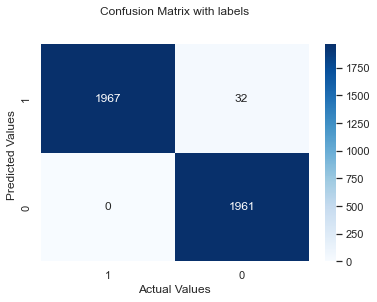

In [163]:
# Visualizing the Confusion Matrix

#
conf_matrix = confusion_matrix(y_test_new, y_pred_h_rf)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt= "g")

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["1","0"])
ax.yaxis.set_ticklabels(["1","0"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [111]:
# We will also try CNN and check its performance

import tensorflow as tf
from tensorflow import keras


In [121]:
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units=10, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=10, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=8, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=6, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
dnn.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.fit(x_train_new, y_train_new, batch_size= 50, epochs= 100)

Epoch 1/100
185/185 [==============================] - 1s 2ms/step - loss: 0.6645 - accuracy: 0.6025
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8060
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8367
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8569
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8605
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8691
Epoch 7/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8751
Epoch 8/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8802
Epoch 9/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.8794
Epoch 10/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2761 - accura

185/185 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9365
Epoch 82/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9375
Epoch 83/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9418
Epoch 84/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.9370
Epoch 85/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9340
Epoch 86/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9336
Epoch 87/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9356
Epoch 88/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9302
Epoch 89/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9395
Epoch 90/100
185/185 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 

In [122]:
# Tried different combinations of number of neurons and number of layers but the accuracy seems to increase with much denser 
# neural network or with more number of neurons in each layer which is again time consuming and computationaly heavy as compared
# to the ML algorithms

(6819, 94)

In [124]:
# Now lets try the PCA for feature selection and then will do model building on new features

bank_df.describe()
X_train_pre_pca = bank_df.drop(["Bankrupt"], axis= 1)
y_train_pre_pca = bank_df["Bankrupt"]

pre_pca_over = RandomOverSampler()
x_train_over_pre_pca, y_train_over_pre_pca = pre_pca_over.fit_resample(X_train_pre_pca, y_train_pre_pca)

large_range_columns_pca = x_train_over_pre_pca[["Operating Expense Rate", "Research and development expense rate", "Total Asset Growth Rate", "Inventory Turnover Rate (times)", "Quick Asset Turnover Rate", "Cash Turnover Rate"]]

# feature scaling

new_scaler_pca = MinMaxScaler()
scaled_columns_pca = new_scaler_pca.fit_transform(large_range_columns_pca)

scaled_columns_pca = pd.DataFrame(scaled_columns_pca, columns=large_range_columns_pca.columns)

# Adding the scaled columns to the main dataframe

temp_df_pca= x_train_over_pre_pca.drop(["Operating Expense Rate", "Research and development expense rate", "Total Asset Growth Rate", "Inventory Turnover Rate (times)", "Quick Asset Turnover Rate", "Cash Turnover Rate"], axis = 1)

latest_bank_df_pca = pd.concat([temp_df_pca, scaled_columns_pca], axis= 1)

latest_bank_df_pca.shape



(13198, 93)

In [125]:
# Perform PCA to check the variance
from sklearn.decomposition import PCA

In [126]:
# Fit PCA
pca = PCA()
fit_pca = pca.fit_transform(latest_bank_df_pca)

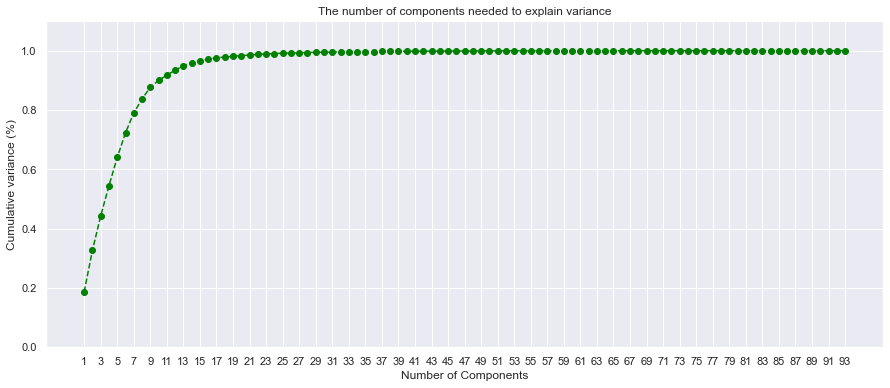

In [127]:
# Plot the cumulative variance for each component
plt.figure(figsize = (15, 6))
components = np.arange(1, 94, step=1)
variance = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(components, variance, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 94, step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.show()

In [128]:
# From the above plot we can see that almost 99.9 % variance can  be achieved by only 30 features 
# Hence we will extract only 30 features from given set of 94  features 

pca = PCA(n_components= 30)
pca.fit(latest_bank_df_pca)
pca.n_components_

30

In [130]:
x_pca = pca.transform(latest_bank_df_pca)
x_pca.shape

(13198, 30)

In [136]:
arb_cols = ["C"+str(i) for i in range(1, 31)]
arb_cols

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30']

In [137]:
x_pca_df = pd.DataFrame(x_pca, columns=arb_cols)
x_pca_df.head()

C1        C2        C3        C4        C5        C6        C7  \
0  0.503485  0.085523 -0.064136 -0.193841 -0.449584  0.056797 -0.150565   
1  0.929877 -0.071823  0.584846  0.355106 -0.074031  0.197634 -0.007588   
2  0.139718 -0.376584 -0.298866 -0.073036 -0.056195  0.202538  0.028221   
3  0.617072 -0.056347  0.420398  0.263122 -0.249847  0.054777  0.006852   
4  0.053327  0.613854 -0.378996  0.183199 -0.056729  0.049801 -0.062881   

         C8        C9       C10       C11       C12       C13       C14  \
0 -0.131277 -0.063753 -0.033544 -0.064610  0.078301 -0.013004  0.077604   
1  0.290403 -0.055969 -0.047946 -0.056842 -0.000188  0.021999  0.088664   
2  0.189642 -0.333552 -0.069819  0.051790 -0.147182 -0.042858 -0.020897   
3 -0.037780  0.050784  0.064938 -0.097268  0.017096 -0.008962  0.031945   
4 -0.274566  0.121798 -0.063004 -0.103719  0.041189  0.084387  0.020229   

        C15       C16       C17       C18       C19       C20       C21  \
0  0.007537 -0.021142 -0.036945  0.009308 -0.015690  0.016486 -0.004035   
1 -0.007712 -0.003759 -0.021879  0.007516 -0.004472  0.026191 -0.006268   
2 -0.053040 -0.064235  0.011602  0.000051 -0.001392  0.003575 -0.024781   
3 -0.026663  0.027795  0.027181  0.003862  0.000097 -0.007018  0.005182   
4 -0.061821  0.044552  0.014344  0.011486 -0.023801 -0.030212  0.026393   

        C22       C23       C24       C25       C26       C27       C28  \
0 -0.014898  0.015980 -0.004108  0.017950 -0.020658  0.019106  0.027552   
1  0.009253  0.004018 -0.012717  0.007183 -0.021450  0.001185  0.005563   
2  0.009400  0.016501 -0.008728 -0.010574 -0.009873 -0.010686  0.001353   
3  0.027389 -0.016510 -0.018597 -0.041546  0.006583  0.009234  0.002866   
4 -0.007881 -0.013851  0.000829  0.001624 -0.005236  0.017070 -0.002833   

        C29       C30  
0  0.007462  0.008338  
1 -0.007984 -0.006970  
2 -0.011286 -0.002364  
3  0.020652  0.032926  
4  0.006575  0.009515

In [138]:
x_pca_df.describe()

C1            C2            C3            C4            C5  \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean  -4.656325e-16  4.619480e-17 -4.732727e-17 -3.842206e-18 -1.957485e-17   
std    4.132453e-01  3.575141e-01  3.263583e-01  3.047232e-01  2.951498e-01   
min   -1.063693e+00 -7.734334e-01 -8.028933e-01 -8.832472e-01 -7.836322e-01   
25%   -3.023561e-01 -2.801434e-01 -2.322737e-01 -1.955036e-01 -2.225973e-01   
50%   -5.301398e-02 -1.036188e-01 -4.726756e-02 -2.122782e-02 -1.860907e-02   
75%    2.716567e-01  2.699408e-01  2.287091e-01  1.761839e-01  1.937330e-01   
max    1.218816e+00  1.256330e+00  1.101678e+00  1.083034e+00  1.097013e+00   

                 C6            C7            C8            C9           C10  \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean  -2.844444e-16  3.168611e-17 -6.814606e-17  1.572444e-16 -1.414277e-19   
std    2.758090e-01  2.468750e-01  2.075725e-01  1.904146e-01  1.445306e-01   
min   -8.488456e-01 -7.706359e-01 -6.660983e-01 -6.953697e-01 -5.000620e-01   
25%   -1.771622e-01 -1.366332e-01 -1.406117e-01 -1.006297e-01 -8.171796e-02   
50%    2.613343e-02 -2.442147e-02 -1.957301e-02  1.103077e-02  1.656232e-02   
75%    1.988869e-01  1.344026e-01  1.325798e-01  1.103103e-01  9.617916e-02   
max    8.489365e-01  8.235404e-01  1.081633e+00  1.161744e+00  6.420190e-01   

                C11           C12           C13           C14           C15  \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean   7.388246e-17  2.050452e-17  5.811679e-18 -4.103190e-17  2.284714e-17   
std    1.278699e-01  1.221502e-01  1.186946e-01  9.415665e-02  7.980129e-02   
min   -4.240000e-01 -6.669423e-01 -6.067626e-01 -5.233245e-01 -4.172030e-01   
25%   -6.182312e-02 -7.832728e-02 -4.025869e-02 -5.224166e-02 -4.551235e-02   
50%   -8.365350e-03 -7.330560e-03  3.104061e-03  8.735199e-03 -4.622430e-03   
75%    5.387481e-02  6.552284e-02  4.862242e-02  6.053184e-02  3.953355e-02   
max    1.241799e+00  7.193940e-01  1.041075e+00  8.459386e-01  7.467449e-01   

                C16           C17           C18           C19           C20  \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean   4.440514e-17  7.344513e-18  4.539881e-18 -6.985686e-17  9.773822e-18   
std    7.013329e-02  6.270676e-02  5.200846e-02  4.754988e-02  4.505828e-02   
min   -3.510996e-01 -4.122905e-01 -4.769426e-01 -3.296999e-01 -1.115794e-01   
25%   -3.766500e-02 -2.691171e-02 -1.328305e-02 -1.969190e-02 -1.560157e-02   
50%   -6.033564e-03 -1.693676e-03 -1.291053e-04 -3.951195e-03 -3.589955e-03   
75%    2.577588e-02  2.472370e-02  1.467233e-02  1.324511e-02  8.987827e-03   
max    7.049996e-01  5.268524e-01  9.312571e-01  6.665163e-01  7.091658e-01   

                C21           C22           C23           C24           C25  \
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04   
mean  -3.471517e-18 -2.550430e-17  3.642315e-17 -2.825452e-17 -3.922857e-17   
std    4.286209e-02  4.121347e-02  3.943339e-02  3.392852e-02  3.277989e-02   
min   -3.753266e-01 -3.016454e-01 -2.164927e-01 -2.486092e-01 -4.675049e-01   
25%   -1.072231e-02 -1.196055e-02 -1.650977e-02 -1.219019e-02 -1.561579e-02   
50%   -6.063007e-04 -7.444222e-04 -4.090674e-03 -1.554911e-03  7.296733e-05   
75%    1.050061e-02  1.272972e-02  1.034528e-02  1.072758e-02  1.254464e-02   
max    6.406152e-01  5.693786e-01  8.061435e-01  2.496033e-01  5.242089e-01   

                C26           C27           C28           C29           C30  
count  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  1.319800e+04  
mean  -1.351370e-17  7.089917e-18  1.006555e-17 -3.281543e-17  3.412600e-18  
std    2.844007e-02  2.771187e-02  2.608586e-02  2.344778e-02  2.170453e-02  
min   -3.575171e-01 -3.452049e-01 -2.718143e-01 -2.855030e-01 -3.036125e-01  
25%   -9.055309e-03 -9.252214e-03 -1.085512e-02 -9.246071e-03 -8.25

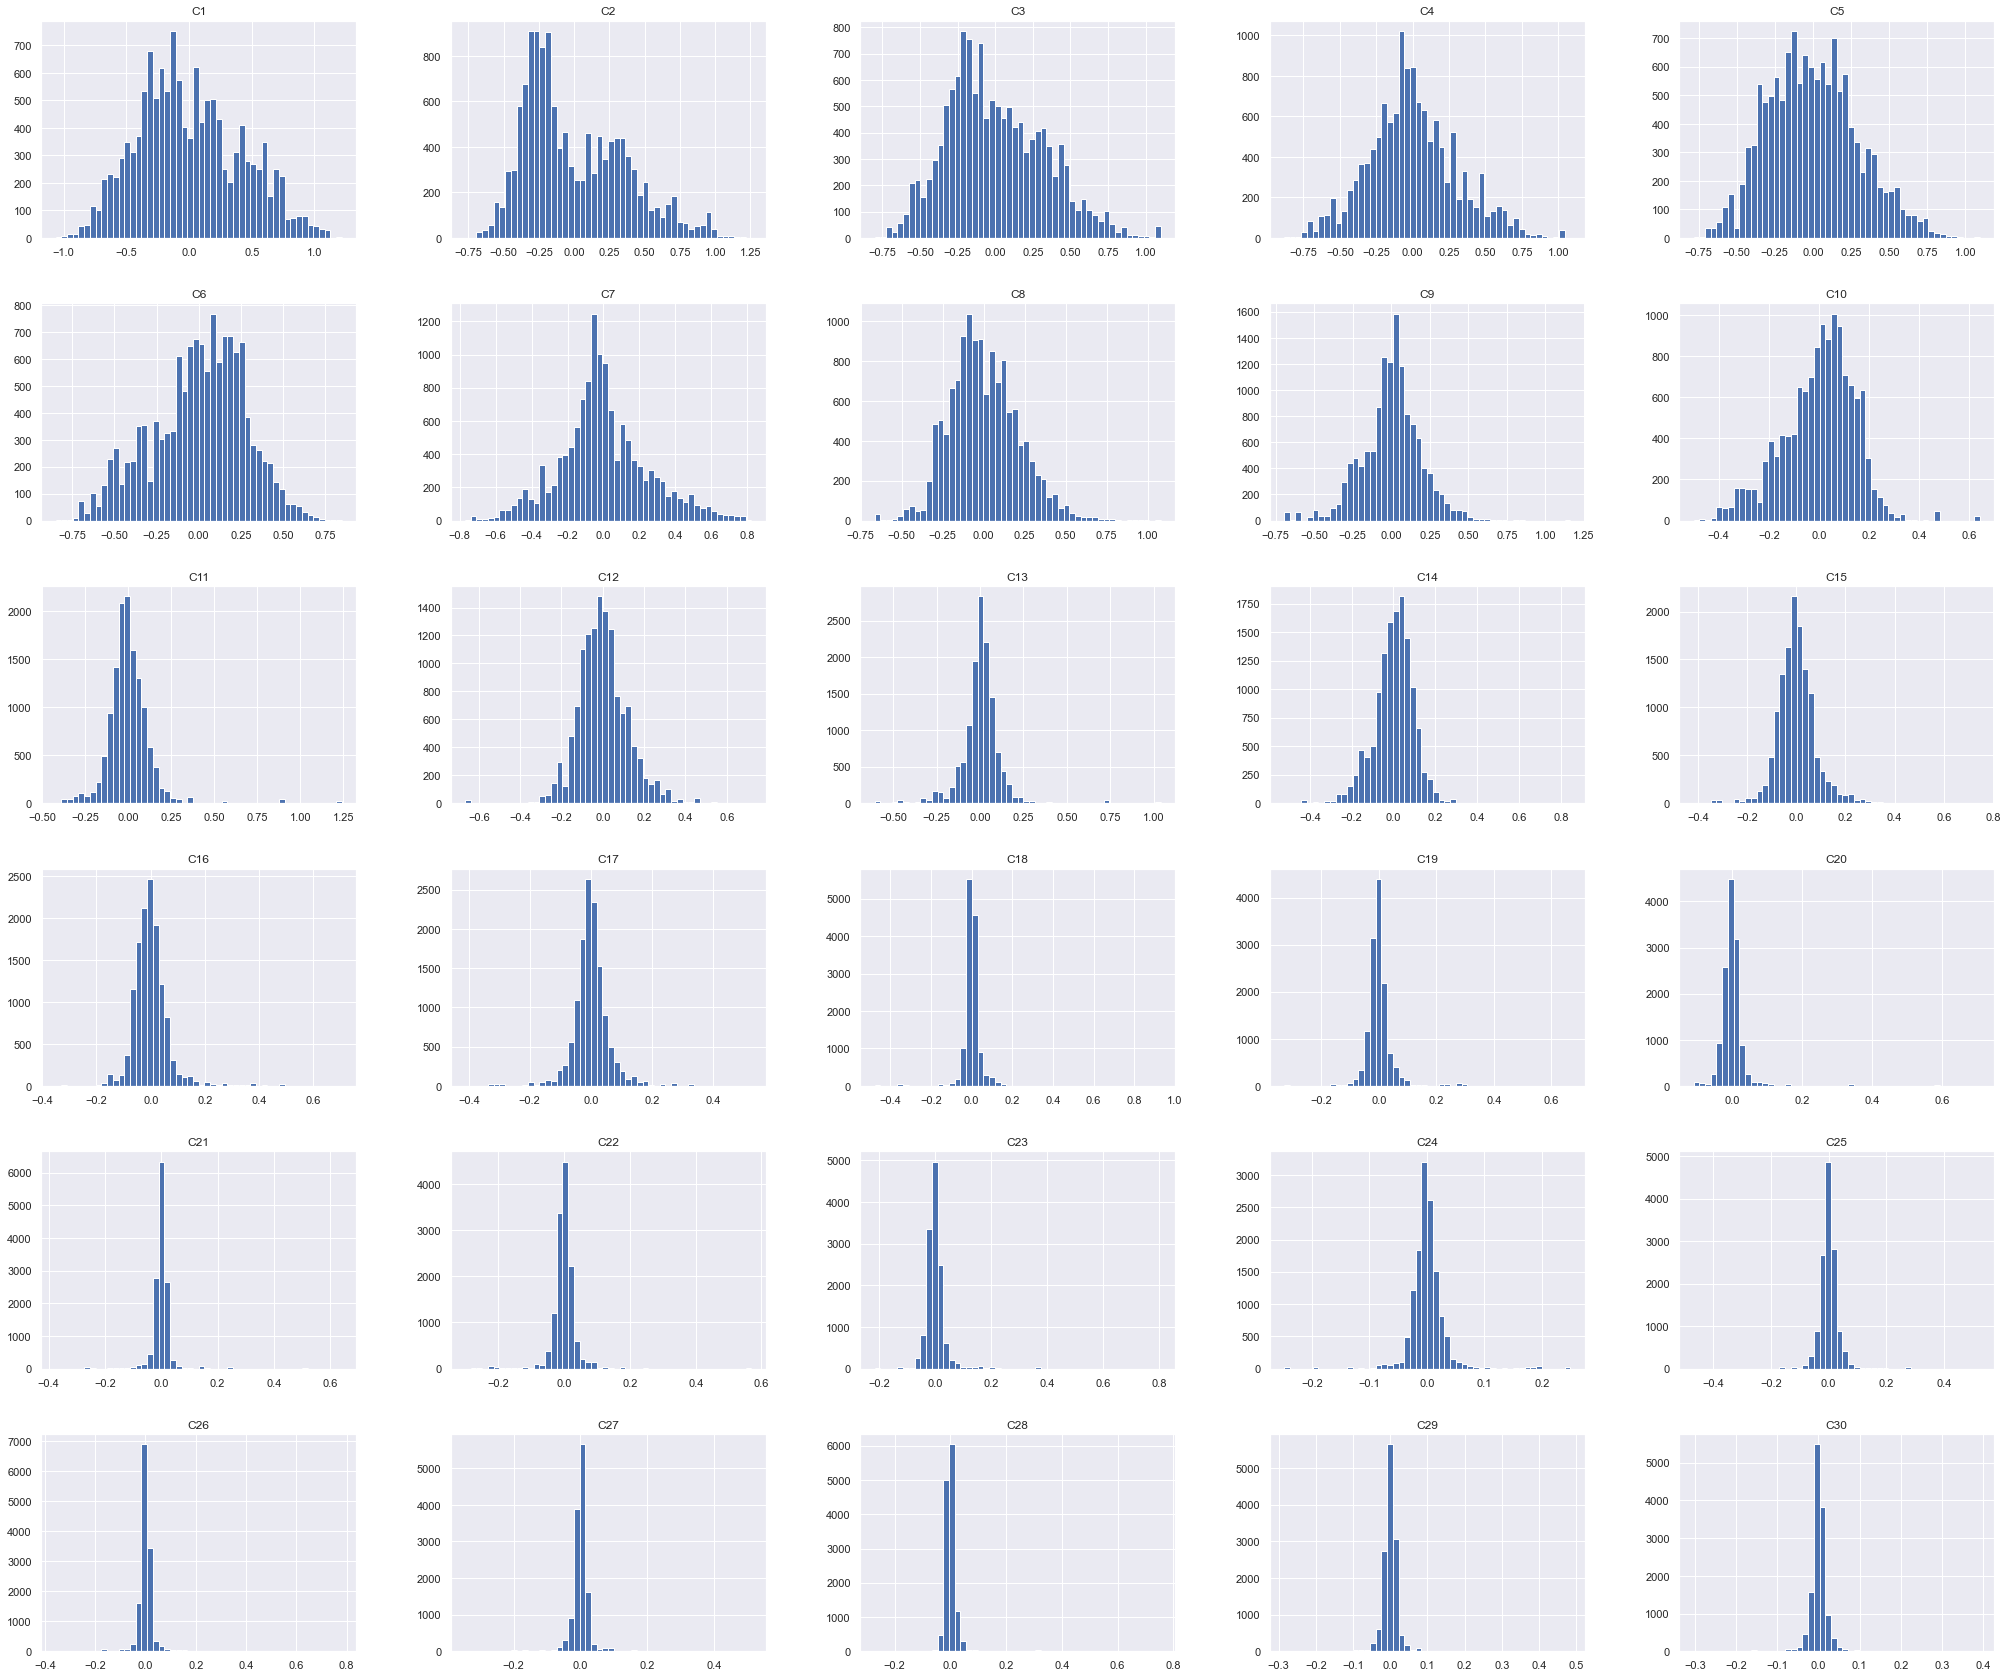

In [139]:
x_pca_df.hist(figsize = (35,30), bins = 50)
plt.show()

In [140]:
# Looking towards the new features and the respective histograms we can say that the data is uniformly distributed

# Now we can proceed forward with the train test split and model traing as we did earlier

In [141]:
# Splitting the data into train and test

x_train_new_pca, x_test_new_pca, y_train_new_pca, y_test_new_pca = train_test_split(x_pca_df, y_train_over_pre_pca, test_size=0.3,random_state=1)

In [142]:
# 1. Logistic Regression with PCA

logmodel_pca = LogisticRegression()
logmodel_pca.fit(x_train_new_pca, y_train_new_pca)
y_pred_log_pca = logmodel_pca.predict(x_test_new_pca)
print("Confusion_Matrix PCA :\n", confusion_matrix(y_test_new_pca, y_pred_log_pca))
print("*****************************")
print("Classification Report PCA :\n", classification_report(y_test_new_pca, y_pred_log_pca))

Confusion_Matrix PCA :
 [[1703  296]
 [ 238 1723]]
*****************************
Classification Report PCA :
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1999
           1       0.85      0.88      0.87      1961

    accuracy                           0.87      3960
   macro avg       0.87      0.87      0.87      3960
weighted avg       0.87      0.87      0.87      3960



In [203]:
print("Accuracy Score : ", accuracy_score(y_test_new_pca, y_pred_log_pca))
print("f1 Score : ", f1_score(y_test_new_pca, y_pred_log_pca))
print("recall Score : ", recall_score(y_test_new_pca, y_pred_log_pca))

Accuracy Score :  0.8651515151515151
f1 Score :  0.8658291457286431
recall Score :  0.8786333503314635


In [205]:
# 2. KNN Model with PCA

knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_new_pca, y_train_new_pca)
y_pred_knn_pca = knn_pca.predict(x_test_new_pca)
print("Confusion_Matrix :\n", confusion_matrix(y_test_new_pca, y_pred_knn_pca))
print("*****************************")
print("Classification Report :\n", classification_report(y_test_new_pca, y_pred_knn_pca))

print("Accuracy Score : ", accuracy_score(y_test_new_pca, y_pred_knn_pca))
print("f1 Score : ", f1_score(y_test_new_pca, y_pred_knn_pca))
print("recall Score : ", recall_score(y_test_new_pca, y_pred_knn_pca))

Confusion_Matrix :
 [[1864  135]
 [   0 1961]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.93      0.97      1999
           1       0.94      1.00      0.97      1961

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

Accuracy Score :  0.9659090909090909
f1 Score :  0.9667241804288883
recall Score :  1.0


In [143]:
# 3. Random Forest with PCA

rf_pca = RandomForestClassifier()
rf_pca.fit(x_train_new_pca, y_train_new_pca)
y_pred_rf_pca = rf_pca.predict(x_test_new_pca)
print("Confusion_Matrix PCA :\n", confusion_matrix(y_test_new_pca, y_pred_rf_pca))
print("*****************************")
print("Classification Report PCA :\n", classification_report(y_test_new_pca, y_pred_rf_pca))

Confusion_Matrix PCA :
 [[1993    6]
 [   0 1961]]
*****************************
Classification Report PCA :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960



In [206]:
print("Accuracy Score : ", accuracy_score(y_test_new_pca, y_pred_rf_pca))
print("f1 Score : ", f1_score(y_test_new_pca, y_pred_rf_pca))
print("recall Score : ", recall_score(y_test_new_pca, y_pred_rf_pca))

Accuracy Score :  0.9984848484848485
f1 Score :  0.9984725050916498
recall Score :  1.0


In [207]:
# 4. SVC Model with PCA

svc_pca = SVC()
svc_pca.fit(x_train_new_pca, y_train_new_pca)
y_pred_svc_pca = svc_pca.predict(x_test_new_pca)
print("Confusion_Matrix :\n", confusion_matrix(y_pred_svc_pca, y_pred_knn_pca))
print("*****************************")
print("Classification Report :\n", classification_report(y_pred_svc_pca, y_pred_knn_pca))

print("Accuracy Score : ", accuracy_score(y_pred_svc_pca, y_pred_knn_pca))
print("f1 Score : ", f1_score(y_pred_svc_pca, y_pred_knn_pca))
print("recall Score : ", recall_score(y_pred_svc_pca, y_pred_knn_pca))

Confusion_Matrix :
 [[1742   84]
 [ 122 2012]]
*****************************
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1826
           1       0.96      0.94      0.95      2134

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960

Accuracy Score :  0.947979797979798
f1 Score :  0.9513002364066194
recall Score :  0.9428303655107779


In [144]:
# 5. XG Boost with PCA

xg_pca = XGBClassifier()
xg_pca.fit(x_train_new_pca, y_train_new_pca)
y_pred_xg_pca = xg_pca.predict(x_test_new_pca)
print("Confusion_Matrix PCA :\n", confusion_matrix(y_test_new_pca, y_pred_xg_pca))
print("*****************************")
print("Classification Report PCA :\n", classification_report(y_test_new_pca, y_pred_xg_pca))

Confusion_Matrix PCA :
 [[1964   35]
 [   0 1961]]
*****************************
Classification Report PCA :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1999
           1       0.98      1.00      0.99      1961

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [208]:
print("Accuracy Score : ", accuracy_score(y_test_new_pca, y_pred_xg_pca))
print("f1 Score : ", f1_score(y_test_new_pca, y_pred_xg_pca))
print("recall Score : ", recall_score(y_test_new_pca, y_pred_xg_pca))

Accuracy Score :  0.9911616161616161
f1 Score :  0.991154915339904
recall Score :  1.0


In [209]:
dnn_pca = tf.keras.models.Sequential()
dnn_pca.add(tf.keras.layers.Dense(units=10, activation='relu'))
dnn_pca.add(tf.keras.layers.Dense(units=10, activation='relu'))
dnn_pca.add(tf.keras.layers.Dense(units=8, activation='relu'))
dnn_pca.add(tf.keras.layers.Dense(units=6, activation='relu'))
dnn_pca.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
dnn_pca.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_pca.fit(x_train_new_pca, y_train_new_pca, batch_size= 50, epochs= 100)

Epoch 1/100
185/185 [==============================] - 2s 2ms/step - loss: 0.5658 - accuracy: 0.7476
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8732
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8872
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8931
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9005
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9066
Epoch 7/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9159
Epoch 8/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2180 - accuracy: 0.9224
Epoch 9/100
185/185 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9229
Epoch 10/100
185/185 [==============================] - 0s 2ms/step - loss: 0.1983 - accura

185/185 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9809
Epoch 82/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9817
Epoch 83/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9815
Epoch 84/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9803
Epoch 85/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.9752
Epoch 86/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9789
Epoch 87/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9788
Epoch 88/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9788
Epoch 89/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9800
Epoch 90/100
185/185 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 

In [145]:
# From the above results we can see that Random Forest and XG Boost classifiers are performing exceptionally well on our new
# features and also our accuraccy and recall has also increased.

In [147]:
# We will now try applying hyper parameter tuning to Random Forest Classifier to avoid over fitting

random_forest_hyper_pca = RandomizedSearchCV(RandomForestClassifier(), hyperF, n_iter=10, cv=10, n_jobs= -1)


<IPython.core.display.Javascript object>

In [148]:
random_forest_hyper_pca.fit(x_train_new_pca, y_train_new_pca)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]})

In [149]:
print(random_forest_hyper_pca.best_params_)
print(random_forest_hyper_pca.best_score_)

{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}
0.9979430194218928


In [150]:
h_rf_pca = RandomForestClassifier(n_estimators= 800, min_samples_split= 10, 
                              min_samples_leaf= 1, max_depth= 30)

h_rf_pca.fit(x_train_new_pca, y_train_new_pca)
y_pred_h_rf_pca = h_rf_pca.predict(x_test_new_pca)
print("Confusion_Matrix PCA :\n", confusion_matrix(y_test_new_pca, y_pred_h_rf_pca))
print("*****************************")
print("Classification Report PCA :\n", classification_report(y_test_new_pca, y_pred_h_rf_pca))

Confusion_Matrix PCA :
 [[1992    7]
 [   0 1961]]
*****************************
Classification Report PCA :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960



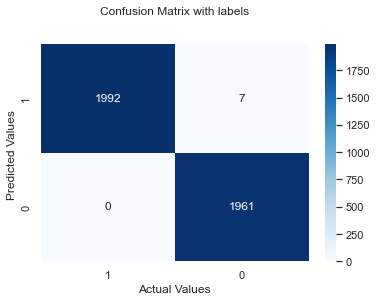

In [162]:
# Visualizing the Confusion Matrix

#
conf_matrix = confusion_matrix(y_test_new_pca, y_pred_h_rf_pca)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt= "g")

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["1","0"])
ax.yaxis.set_ticklabels(["1","0"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [164]:
# From the above analysis of different models with and without PCA we can say that model with PCA gives slightly better results
# than without PCA.
# But here the number of features are getting reduced hence the computational time and space required for training even advanced
# algorithms can be possible using PCA.

In [165]:
# Now we will plot some validation curves

In [166]:
from sklearn.model_selection import validation_curve
import plotly.graph_objects as go

In [167]:
def plot_validation_curves(estimator, X, y, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator=estimator,
        X=X,
        y=y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=train_mean,
            name="Training Accuracy",
            mode="lines",
            line=dict(color="Blue"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=param_range,
            y=test_mean,
            name="Validation Accuracy",
            mode="lines",
            line=dict(color="Green"),
        )
    )

    fig.update_layout(
        title="Validation Curves", xaxis_title=param_name, yaxis_title="Accuracy"
    )

    fig.show()

In [168]:
crf = RandomForestClassifier()

In [169]:

param_range = np.arange(3, 30, 3)

plot_validation_curves(crf, x_pca_df, y_train_over_pre_pca, "max_depth", param_range, 5)

In [170]:
# from above graph we can say that training accuracy and testing accuracy becomes gradual after max_depth = 20

In [171]:

param_range = np.arange(2, 20, 2)

plot_validation_curves(crf, x_pca_df, y_train_over_pre_pca, "min_samples_split", param_range, 3)

In [172]:
# From above graph it can be seen that first accuracy decreases till 4 for validation set then increases till 
# min_samples_split = 6 after which it again starts decreasing. 
# But the variation of accuracy is very less hence we can use min_samples_split = 2

In [173]:

param_range = np.arange(1, 10, 1)

plot_validation_curves(crf, x_pca_df, y_train_over_pre_pca, "min_samples_leaf", param_range, 3)

In [174]:
# In above graph we can see that accuarcy is consantly decreasing from start for both train and test
# hence we can say that min_sample_leaf = 1 can can be a good choice.

In [177]:

param_range = np.arange(100, 1100, 100)

plot_validation_curves(crf, x_pca_df, y_train_over_pre_pca, "n_estimators", param_range, 3)

In [178]:
# It can be seen from the above graph that accuracy is maximum when n_estimators = 300 after which it starts decreasing but even 
# with n_estimators = 100 its giving very good accuracy hence we can use it.

In [210]:
# Using above hyper-parameters to tune the Random Forest Classifier

rf_pca_tuned = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, 
                              min_samples_leaf= 1, max_depth= 20)

rf_pca_tuned.fit(x_train_new_pca, y_train_new_pca)
y_pred_rf_pca_tuned = rf_pca_tuned.predict(x_test_new_pca)

print("Confusion_Matrix PCA :\n", confusion_matrix(y_test_new_pca, y_pred_rf_pca_tuned))
print("*****************************")
print("Classification Report PCA :\n", classification_report(y_test_new_pca, y_pred_rf_pca_tuned))


print("Accuracy Score : ", accuracy_score(y_test_new_pca, y_pred_rf_pca_tuned))
print("f1 Score : ", f1_score(y_test_new_pca, y_pred_rf_pca_tuned))
print("recall Score : ", recall_score(y_test_new_pca, y_pred_rf_pca_tuned))

Confusion_Matrix PCA :
 [[1983   16]
 [   0 1961]]
*****************************
Classification Report PCA :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1999
           1       0.99      1.00      1.00      1961

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960

Accuracy Score :  0.9959595959595959
f1 Score :  0.9959370238699848
recall Score :  1.0


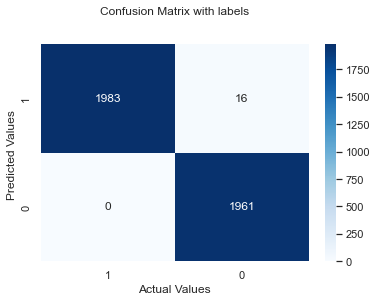

In [211]:
# Visualizing the Confusion Matrix

#
conf_matrix = confusion_matrix(y_test_new_pca, y_pred_rf_pca_tuned)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt= "g")

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["1","0"])
ax.yaxis.set_ticklabels(["1","0"])

## Display the visualization of the Confusion Matrix.
plt.show()